<div style="background-color: #f0f8ff; padding: 20px; border-radius: 5px;">
  <h2><i style="color: navy;"></i> <strong>1. Aim and Objectives</strong></h2>
  <p>This section outlines the primary aim and specific objectives of this project, as detailed in the problem statement.</p>
  <ul>
    <li><b>Aim:</b> To develop a machine learning model that accurately predicts airline passenger satisfaction.</li>
    <li><b>Objectives:</b>
      <ul>
        <li>Predict whether a customer will be "Satisfied" or "Neutral/Unhappy".</li>
        <li>Identify the key factors that influence customer satisfaction.</li>
        <li>Provide insights that enable airlines to improve customer experience.</li>
        <li>Segment customers based on their likelihood of satisfaction for targeted service improvements.</li>
      </ul>
    </li>
  </ul>
</div>

***
***

<div style="background-color: #f0f8ff; padding: 20px; border-radius: 5px;">
  <h2><i style="color: navy;"></i><strong> 2. Data Understanding</strong></h2>
  <p>This crucial phase involves loading the dataset, exploring its characteristics, cleaning inconsistencies, and preparing it for machine learning model training.</p>
</div>



<div style="background-color: #f0f8ff; padding: 20px; border-radius: 5px;">
  <h3><i style="color: darkgreen;"></i> <strong>2.1. Import Libraries for EDA</strong></h3>
  <p>To perform Exploratory Data Analysis (EDA) effectively, it's essential to import the following Python libraries. These libraries provide powerful tools for data manipulation, numerical computation, and data visualization.</p>


In [1]:

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns # 
import plotly.express as px 

import warnings
warnings.filterwarnings('ignore')


<div style="background-color: #f0f8ff; padding: 20px; border-radius: 5px;">
  <h3><i style="color: darkgreen;"></i> <strong>2.2. Data Loading</strong></h3>
  <p>Load the dataset (presumably in a format like CSV) into a Pandas DataFrame for efficient manipulation and analysis.</p>
</div>


In [2]:

df = pd.read_csv('../data/Data.csv')


***
***

<div style="background-color: #f0f8ff; padding: 20px; border-radius: 5px;">
  <h3><i style="color: darkgreen;"></i> <strong>2.3. Initial Data Inspection</strong></h3>
  <p>Before diving into in-depth analysis, it's crucial to perform an initial inspection of the dataset to understand its basic structure, data types, and potential issues. This step helps us get acquainted with the data and informs subsequent analysis and preprocessing steps.</p>
</div>


<div style="background-color: #f0f8ff; padding: 20px; border-radius: 5px;">
  <h3><i style="color: darkorange;"></i> <strong>2.3.1. Basic Information</strong></h3>
  <p>We'll use Pandas functions to get a quick overview of the dataset:</p>
</div>

In [3]:

df = df.drop(columns='ID',axis=1)

display(df.head())
print(70*"-")
display(df.info())
print(70*"-")
display(df.shape)
print(70*"-")

object_columns = df.select_dtypes(include=['object']).columns
print("Object Type Columns : ")
print(object_columns)
print(70*"-")
numerical_columns = df.select_dtypes(include=['int64','float64']).columns
print("\nNumerical Type Columns : ")
print(numerical_columns)


Gender  Age Customer Type Type of Travel     Class Flight Distance  \
0    Male   48    First-time       Business  Business             821   
1  Female   35     Returning       Business  Business             821   
2    Male   41     Returning       Business  Business             853   
3    Male   50     Returning       Business  Business            1905   
4  Female   49     Returning       Business  Business            3470   

   Departure Delay  Arrival Delay  Departure and Arrival Time Convenience  \
0                2            5.0                                       3   
1               26           39.0                                       2   
2                0            0.0                                       4   
3                0            0.0                                       2   
4                0            1.0                                       3   

   Ease of Online Booking  ...  On-board Service  Seat Comfort  \
0                       3  ...                 3             5   
1                       2  ...                 5             4   
2                       4  ...                 3             5   
3                       2  ...                 5             5   
4                       3  ...                 3             4   

   Leg Room Service  Cleanliness  Food and Drink  In-flight Service  \
0                 2            5               5                  5   
1                 5            5               3                  5   
2                 3            5               5                  3   
3                 5            4               4                  5   
4                 4            5               4                  3   

   In-flight Wifi Service  In-flight Entertainment  Baggage Handling  \
0                       3                        5                 5   
1                       2                        5                 5   
2                       4                        3                 3   
3                       2                        5                 5   
4                       3                        3                 3   

              Satisfaction  
0  Neutral or Dissatisfied  
1                Satisfied  
2                Satisfied  
3                Satisfied  
4                Satisfied  

[5 rows x 23 columns]

----------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   Gender                                  129880 non-null  object 
 1   Age                                     129880 non-null  int64  
 2   Customer Type                           129880 non-null  object 
 3   Type of Travel                          129880 non-null  object 
 4   Class                                   129880 non-null  object 
 5   Flight Distance                         129880 non-null  object 
 6   Departure Delay                         129880 non-null  int64  
 7   Arrival Delay                           129487 non-null  float64
 8   Departure and Arrival Time Convenience  129880 non-null  int64  
 9   Ease of Online Booking                  129

None

----------------------------------------------------------------------


(129880, 23)

----------------------------------------------------------------------
Object Type Columns : 
Index(['Gender', 'Customer Type', 'Type of Travel', 'Class', 'Flight Distance',
       'Satisfaction'],
      dtype='object')
----------------------------------------------------------------------

Numerical Type Columns : 
Index(['Age', 'Departure Delay', 'Arrival Delay',
       'Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling'],
      dtype='object')


<div style="background-color: #f0f8ff; padding: 20px; border-radius: 5px;">
  <h3><i style="color: darkgreen;"></i><strong>2.3.2. Identifying Missing and Duplicate Values</strong></h3>
  <p>It's crucial to check for missing and duplicate values early on, as they can significantly impact model training.</p>
</div>


In [4]:

display(df.isnull().sum())
print(50*'-')
print(f"Total missing values: {df.isnull().sum().sum()}")


Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             0
Departure Delay                             0
Arrival Delay                             393
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                             0
Gate Location                               0
On-board Service                            0
Seat Comfort                                0
Leg Room Service                            0
Cleanliness                                 0
Food and Drink                              0
In-flight Service                           0
In-flight Wifi Service                      0
In-flight Entertainment                     0
Baggage Handling                  

--------------------------------------------------
Total missing values: 393


In [5]:

print(f"Total duplicate values: {df.duplicated().sum()}")


Total duplicate values: 0


<div style="background-color: #f0f8ff; padding: 20px; border-radius: 5px;">
  <h3><i style="color: purple;"></i><strong>2.4. Data Cleaning and Preprocessing</strong></h3>
  <p>Prepare the data for EDA by addressing missing values.</p>
  <ul>
    <li><b>Missing Value Handling:</b> For numerical columns, a common and often robust approach is to impute missing values using the median. The median is less sensitive to outliers compared to the mean.</li>
  </ul>
</div>


In [6]:

df['Arrival Delay'].fillna(df['Arrival Delay'].median(), inplace=True)
df.isnull().sum()


Gender                                    0
Age                                       0
Customer Type                             0
Type of Travel                            0
Class                                     0
Flight Distance                           0
Departure Delay                           0
Arrival Delay                             0
Departure and Arrival Time Convenience    0
Ease of Online Booking                    0
Check-in Service                          0
Online Boarding                           0
Gate Location                             0
On-board Service                          0
Seat Comfort                              0
Leg Room Service                          0
Cleanliness                               0
Food and Drink                            0
In-flight Service                         0
In-flight Wifi Service                    0
In-flight Entertainment                   0
Baggage Handling                          0
Satisfaction                    

<div style="background-color: #f0f8ff; padding: 20px; border-radius: 5px;">
  <h3><i style="color: purple;"></i><strong>2.4.1 Standardize Column Names</strong></h3>
  <p>Standardizing column names is an important preprocessing step that improves code readability and reduces the risk of errors when referencing columns later in the analysis. This involves making column names consistent, typically by:</p>
  <ul>
    <li><b>Removing Spaces:</b> Replacing spaces with underscores or removing them entirely.</li>
    <li><b>Converting to Lowercase:</b> Making all column names lowercase.</li>
    <li><b>Removing Special Characters:</b> Eliminating any non-alphanumeric characters.</li>
    <li><b>Shortening Names (Judiciously):</b> If names are excessively long, shortening them to a reasonable length while maintaining clarity.</li>
  </ul>
</div>


In [7]:

df.columns = [col.strip().lower().replace(' ', '_') for col in df.columns]
display(df.columns)


Index(['gender', 'age', 'customer_type', 'type_of_travel', 'class',
       'flight_distance', 'departure_delay', 'arrival_delay',
       'departure_and_arrival_time_convenience', 'ease_of_online_booking',
       'check-in_service', 'online_boarding', 'gate_location',
       'on-board_service', 'seat_comfort', 'leg_room_service', 'cleanliness',
       'food_and_drink', 'in-flight_service', 'in-flight_wifi_service',
       'in-flight_entertainment', 'baggage_handling', 'satisfaction'],
      dtype='object')

<div style="background-color: #f0f8ff; padding: 20px; border-radius: 5px;">
<h3><i style="color: purple;"></i><strong>2.4.2. Type Conversion </strong></h3>
  <p>Type conversion is the process of changing data from one type to another, such as converting strings to integers or floats to categories. This step ensures that all features are in a format suitable for analysis and modeling. In this case, object-type columns were successfully converted to integer type to enable proper numerical processing.</p>
</div>


In [8]:

df[df['flight_distance'].str.contains(r'\D', regex=True, na=False)]


gender  age customer_type type_of_travel     class flight_distance  \
54     Male   36     Returning       Business  Business           3655$   
147  Female   54     Returning       Business  Business            22%7   
157    Male   22    First-time       Business   Economy            2$27   

     departure_delay  arrival_delay  departure_and_arrival_time_convenience  \
54                40           71.0                                       1   
147               58           62.0                                       3   
157                0            0.0                                       4   

     ease_of_online_booking  ...  on-board_service  seat_comfort  \
54                        1  ...                 3             3   
147                       3  ...                 2             3   
157                       1  ...                 3             2   

     leg_room_service  cleanliness  food_and_drink  in-flight_service  \
54                  3            2               1                  3   
147                 2            3               2                  2   
157                 2            2               2                  4   

     in-flight_wifi_service  in-flight_entertainment  baggage_handling  \
54                        1                        3                 1   
147                       2                        2                 2   
157                       1                        2                 3   

                satisfaction  
54   Neutral or Dissatisfied  
147  Neutral or Dissatisfied  
157  Neutral or Dissatisfied  

[3 rows x 23 columns]

In [9]:

non_digit_count = df['flight_distance'].str.contains(r'\D', regex=True).sum()
print(f"Rows with non-digit characters: {non_digit_count}")


Rows with non-digit characters: 3


In [10]:

# Remove non-digit characters (keep only digits)
df['flight_distance'] = df['flight_distance'].replace(r'[^\d]', '', regex=True)

# Convert to integer type
df['flight_distance'] = df['flight_distance'].astype('int64')


In [11]:
df.dtypes

gender                                     object
age                                         int64
customer_type                              object
type_of_travel                             object
class                                      object
flight_distance                             int64
departure_delay                             int64
arrival_delay                             float64
departure_and_arrival_time_convenience      int64
ease_of_online_booking                      int64
check-in_service                            int64
online_boarding                             int64
gate_location                               int64
on-board_service                            int64
seat_comfort                                int64
leg_room_service                            int64
cleanliness                                 int64
food_and_drink                              int64
in-flight_service                           int64
in-flight_wifi_service                      int64


<div style="background-color: #f0f8ff; padding: 20px; border-radius: 5px;">
<h3><i style="color: purple;"></i><strong>2.4.3. Exploring Features</strong></h3>
  <p>For features, we will examine the unique values and their frequencies to understand the distribution of categories.</p>
</div>


In [12]:


def classify_features(df):
    categorical_features = []
    non_categorical_features = []
    discrete_features = []
    continuous_features = []

    for column in df.columns:
        if df[column].dtype == 'object':
            if df[column].nunique() < 10:
                categorical_features.append(column)
            else:
                non_categorical_features.append(column)
        elif df[column].dtype in ['int64','float64']:
            if df[column].nunique() < 10:
                discrete_features.append(column)
            else:
                continuous_features.append(column)
    return categorical_features, non_categorical_features, discrete_features, continuous_features               

categorical_features, non_categorical_features, discrete_features, continuous_features = classify_features(df)


In [13]:


print("Categorical Features :", categorical_features)
print(90*"-")
print("Non-Categorical Features :", non_categorical_features)
print(90*"-")
print("Discrete Features :", discrete_features)
print(90*"-")
print("Continuous Features :", continuous_features)
print(90*"-")


Categorical Features : ['gender', 'customer_type', 'type_of_travel', 'class', 'satisfaction']
------------------------------------------------------------------------------------------
Non-Categorical Features : []
------------------------------------------------------------------------------------------
Discrete Features : ['departure_and_arrival_time_convenience', 'ease_of_online_booking', 'check-in_service', 'online_boarding', 'gate_location', 'on-board_service', 'seat_comfort', 'leg_room_service', 'cleanliness', 'food_and_drink', 'in-flight_service', 'in-flight_wifi_service', 'in-flight_entertainment', 'baggage_handling']
------------------------------------------------------------------------------------------
Continuous Features : ['age', 'flight_distance', 'departure_delay', 'arrival_delay']
------------------------------------------------------------------------------------------


<div style="background-color: #f0f8ff; padding: 20px; border-radius: 5px;">
  <h3><i style="color: darkorange;"></i><strong>2.5. Exploratory Data Analysis (EDA)</strong></h3>
  <p>Conduct a thorough examination of the dataset to understand its structure, identify patterns, and potential issues.</p>
</div>

In [14]:

for i in categorical_features:
    print(i)
    print(df[i].unique())
    print()
    

gender
['Male' 'Female']

customer_type
['First-time' 'Returning']

type_of_travel
['Business' 'Personal']

class
['Business' 'Economy' 'Economy Plus']

satisfaction
['Neutral or Dissatisfied' 'Satisfied']



In [15]:

for i in categorical_features:
    print(df[i].value_counts())
    print()
    

gender
Female    65899
Male      63981
Name: count, dtype: int64

customer_type
Returning     106100
First-time     23780
Name: count, dtype: int64

type_of_travel
Business    89693
Personal    40187
Name: count, dtype: int64

class
Business        62160
Economy         58309
Economy Plus     9411
Name: count, dtype: int64

satisfaction
Neutral or Dissatisfied    73452
Satisfied                  56428
Name: count, dtype: int64



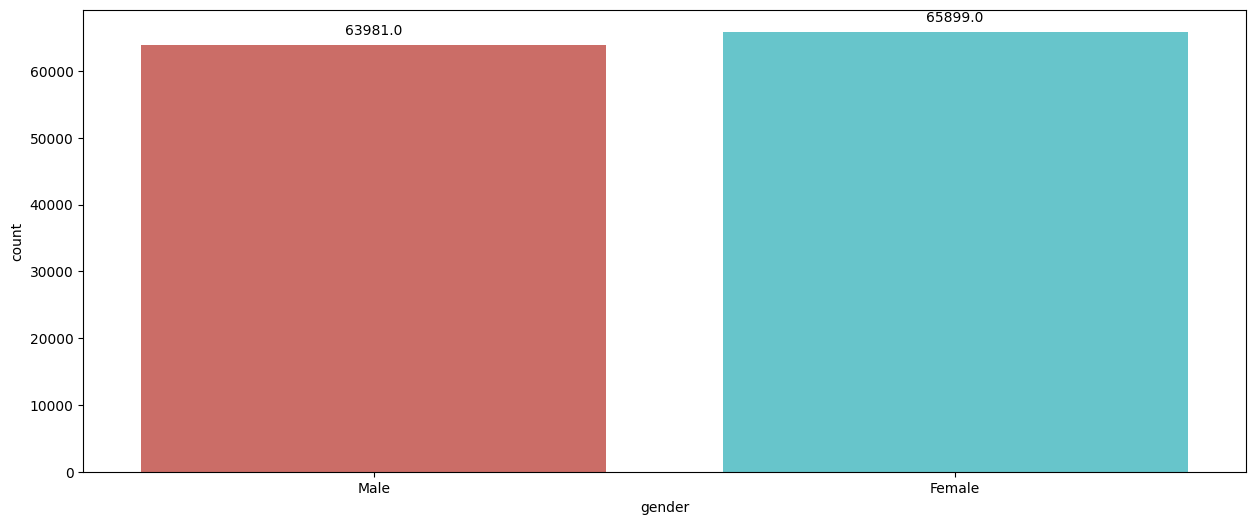

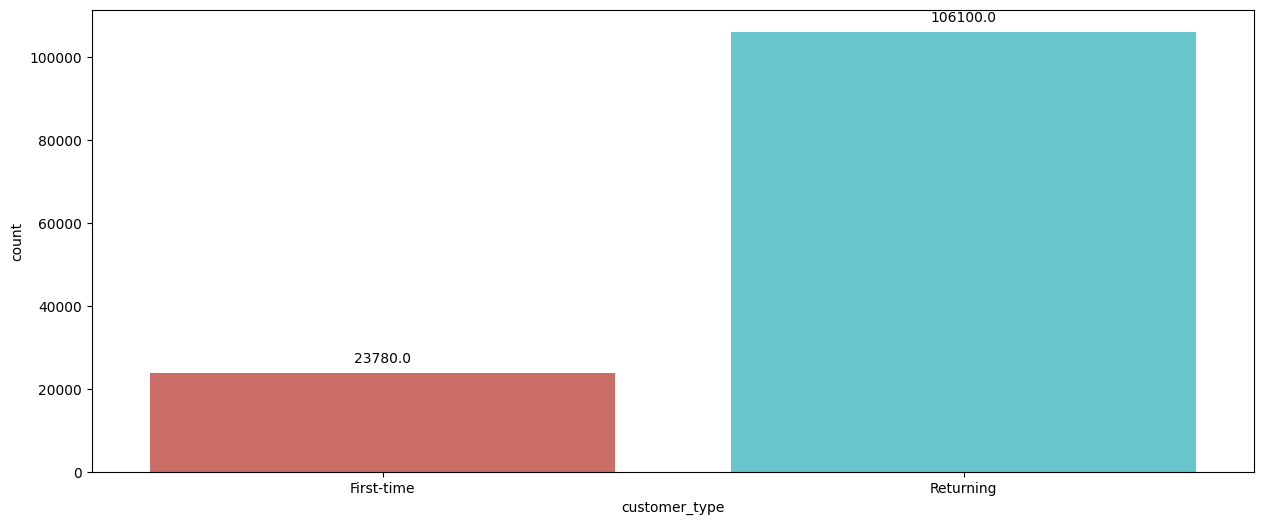

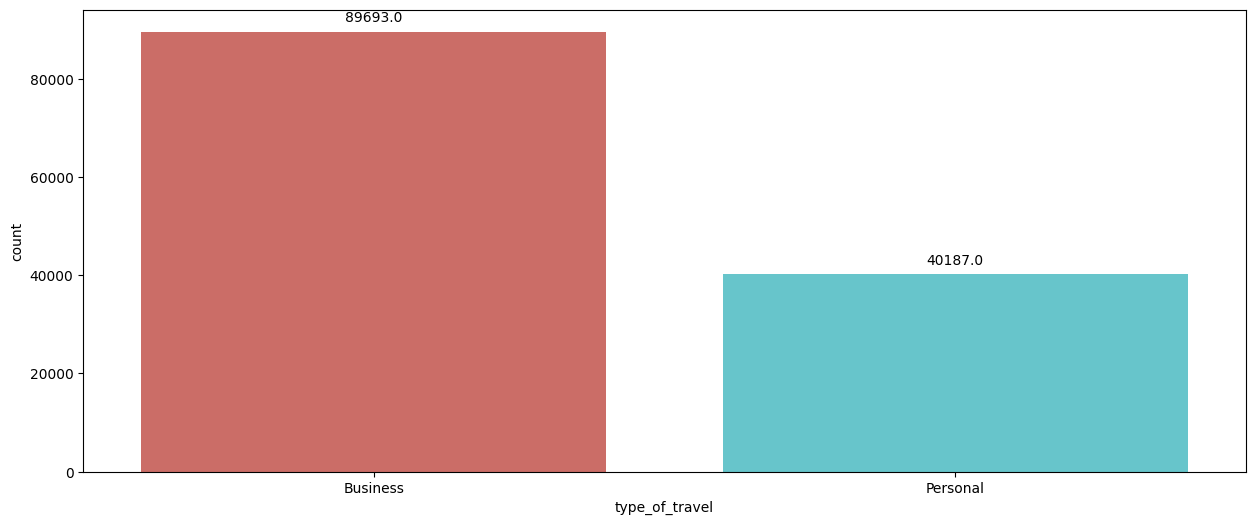

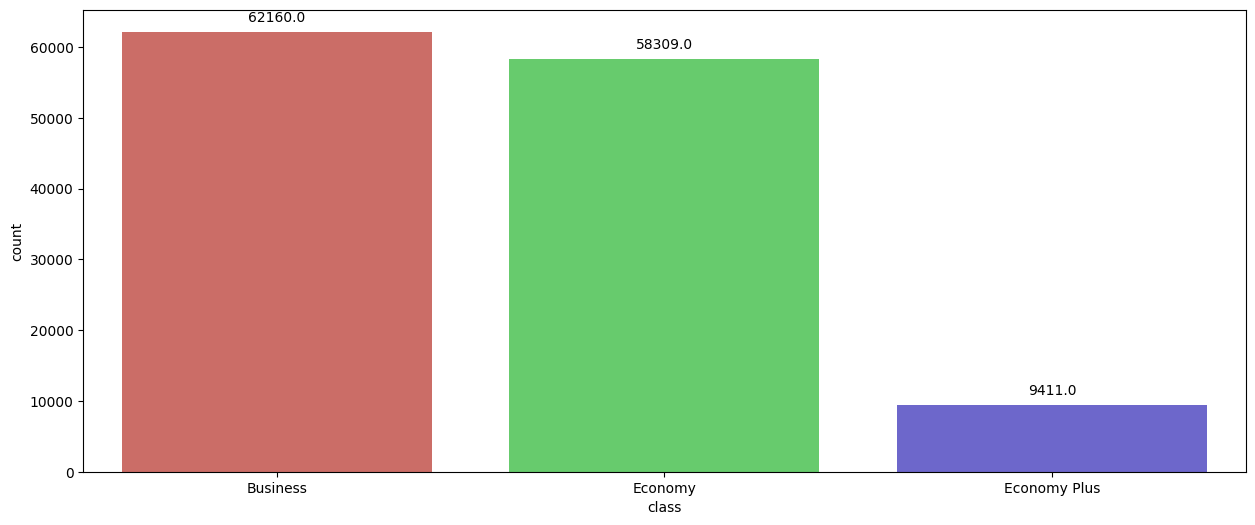

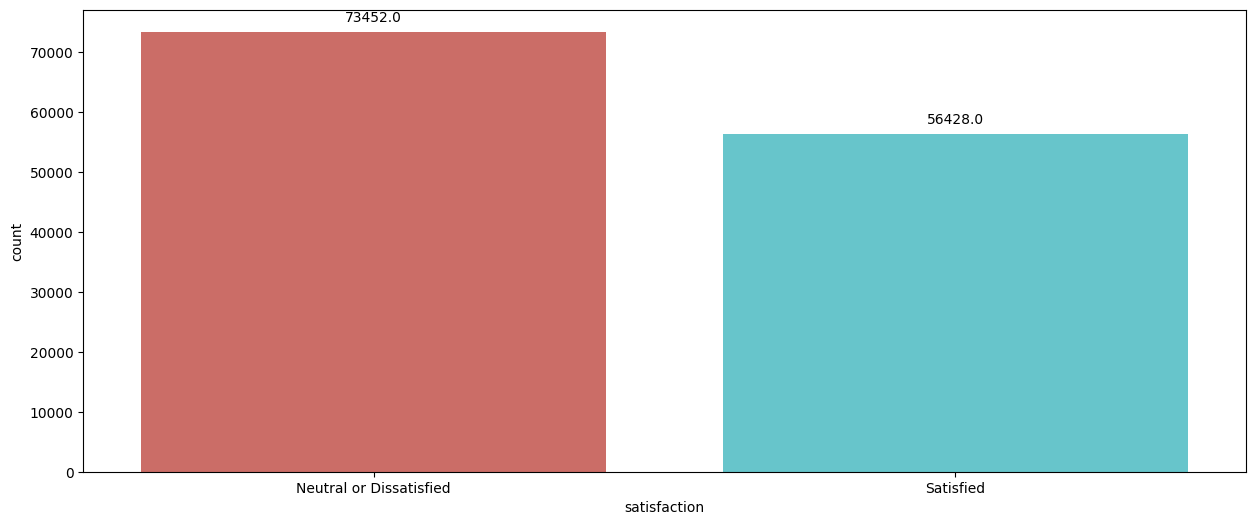

In [16]:

for i in categorical_features:
    plt.figure(figsize=(15,6))
    ax = sns.countplot(x=i, data=df, palette='hls')
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f"{height}", 
                    xy=(p.get_x() + p.get_width() / 2., height), 
                    xytext = (0,10), 
        textcoords="offset points",
        ha="center", va="center")
    plt.show()
    

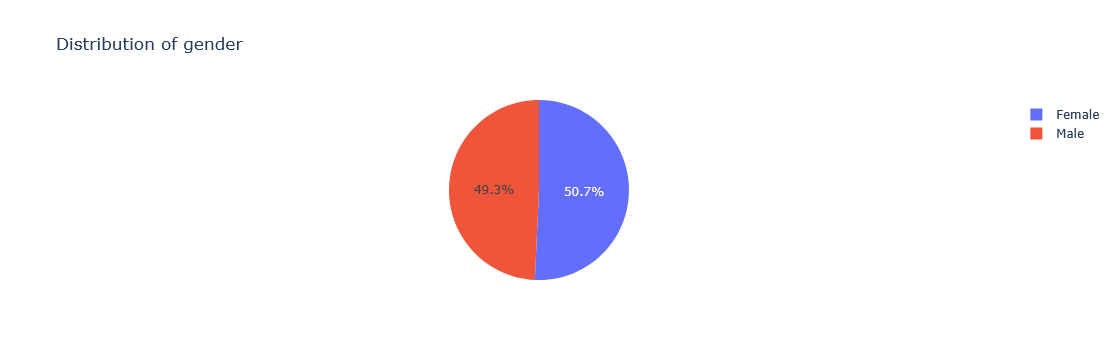

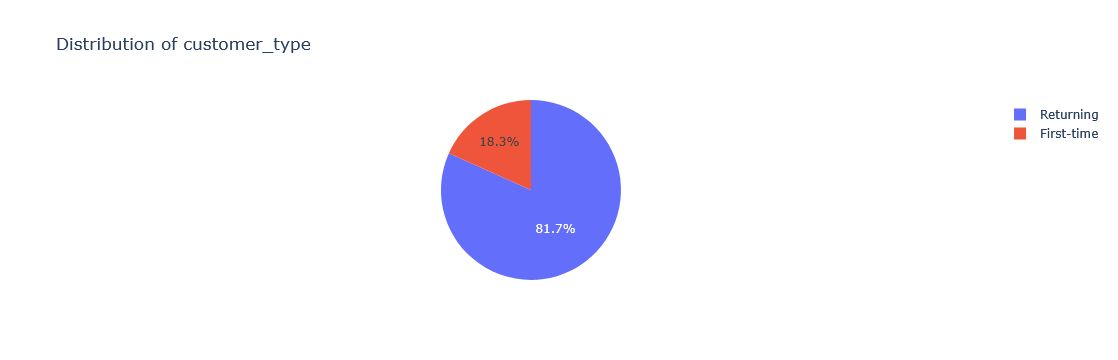

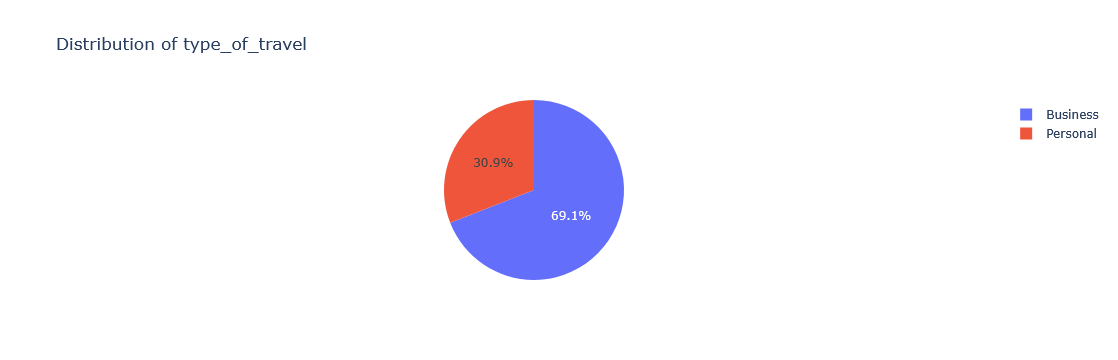

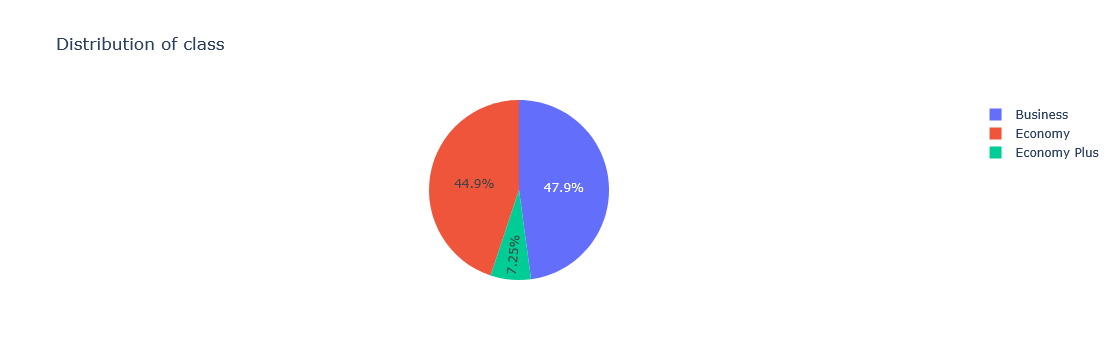

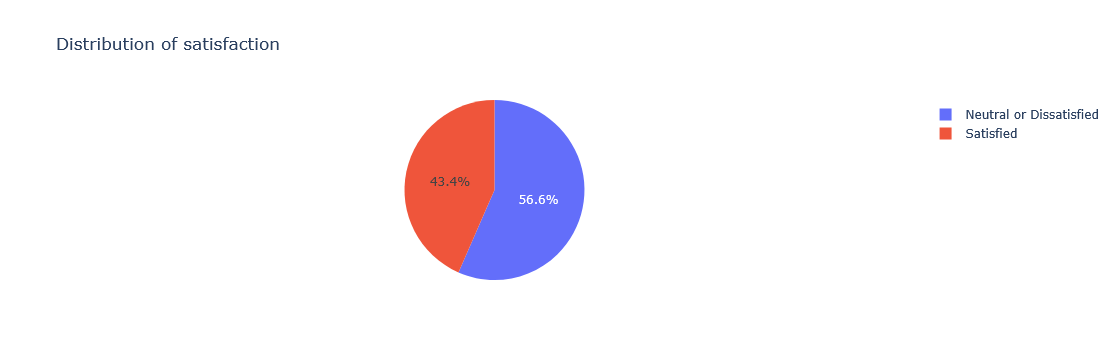

In [17]:

for i in categorical_features:
    counts = df[i].value_counts()
    fig = px.pie(counts, values=counts.values, names=counts.index, title=f"Distribution of {i}")
    fig.show()
    

<div style="background-color: #f0f8ff; padding: 20px; border-radius: 5px;">
  <h3><i style="color: darkorange;"></i><strong>Interpretation of Gender Distribution</strong></h3>
  <p>The provided pie chart visualizes the distribution of the 'Gender' feature within the airline passenger dataset.</p>
  <p><b>Key Observations:</b></p>
  <ul>
    <li>The chart shows two segments, representing 'Female' and 'Male' passengers.</li>
    <li>The segment for 'Male' passengers occupies 50.7% of the pie chart.</li>
    <li>The segment for 'Female' passengers occupies 49.3% of the pie chart.</li>
  </ul>
  <p><b>Interpretation:</b></p>
  <p>The gender distribution in this airline passenger dataset appears to be quite balanced. There is a slightly higher proportion of male passengers (50.7%) compared to female passengers (49.3%). The difference is relatively small, suggesting that both genders are well-represented in the dataset.</p>
  <p><b>Implications for Analysis:</b></p>
  <ul>
    <li>Given the near equal distribution, gender might not be a dominant factor influencing overall passenger satisfaction on its own. However, it's still important to consider if gender interacts with other features (e.g., travel class, type of travel) to impact satisfaction levels.</li>
  </ul>

  <h3><i style="color: darkorange;"></i><strong>Interpretation of Customer Type Distribution</strong></h3>
  <p>The provided pie chart illustrates the distribution of the 'Customer Type' feature within the airline passenger dataset.</p>
  <p><b>Key Observations:</b></p>
  <ul>
    <li>The chart is divided into two segments, representing 'Returning' and 'First-time' customers.</li>
    <li>The segment for 'Returning' customers constitutes a significant majority, accounting for 81.7% of the pie chart.</li>
    <li>The segment for 'First-time' customers represents a smaller portion, at 18.3%.</li>
  </ul>
  <p><b>Interpretation:</b></p>
  <p>The dataset shows a clear dominance of returning customers. This suggests that a large portion of the data comes from passengers who have flown with the airline before. First-time customers make up a much smaller segment of the dataset.</p>
  <p><b>Implications for Analysis:</b></p>
  <ul>
    <li>The strong presence of returning customers could indicate a degree of loyalty or that the airline has a well-established customer base.</li>
  </ul>

<h3><i style="color: darkorange;"></i><strong>Interpretation of Type of Travel Distribution</strong></h3>
  <p>The provided pie chart displays the distribution of the 'Type of Travel' feature among the airline passengers in the dataset.</p>
  <p><b>Key Observations:</b></p>
  <ul>
    <li>The chart is divided into two segments, representing 'Business' and 'Personal' travel.</li>
    <li>The 'Business' travel segment constitutes the larger portion, accounting for 69.1% of the passengers.</li>
    <li>The 'Personal' travel segment represents the remaining 30.9% of the passengers.</li>
  </ul>
  <p><b>Interpretation:</b></p>
  <p>The data indicates that a significant majority of the passengers in this dataset are traveling for business purposes. Passengers traveling for personal reasons make up a considerably smaller proportion.</p>
  <p><b>Implications for Analysis:</b></p>
  <ul>
    <li>The dominance of business travelers might influence the overall satisfaction levels and the importance of certain service aspects. For example, factors like punctuality, Wi-Fi connectivity, and comfortable workspaces might be more critical for business travelers.</li>
  </ul>

<h3><i style="color: darkorange;"></i><strong>Interpretation of Travel Class Distribution</strong></h3>
  <p>The provided pie chart shows the distribution of the 'Class' feature, representing the travel class of the passengers in the dataset.</p>
  <p><b>Key Observations:</b></p>
  <ul>
    <li>The chart is divided into three segments: 'Business', 'Economy', and 'Economy Plus'.</li>
    <li>'Business' class passengers make up the largest segment, accounting for 47.9% of the total.</li>
    <li>'Economy' class passengers represent the second largest segment, at 44.9%.</li>
    <li>'Economy Plus' passengers constitute a smaller segment, at 7.2%.</li>
  </ul>
  <p><b>Interpretation:</b></p>
  <p>The distribution of travel class is relatively balanced between 'Business' and 'Economy', with 'Business' having a slight edge. 'Economy Plus' represents a smaller but still notable portion of the passengers.</p>
  <p><b>Implications for Analysis:</b></p>
  <ul>
    <li>Travel class is likely to be a significant factor influencing passenger satisfaction. Expectations and service levels often differ considerably across these classes.</li>
  </ul>

<h3><i style="color: darkorange;"></i><strong>Interpretation of Overall Satisfaction Distribution</strong></h3>
  <p>The provided pie chart illustrates the distribution of the target variable, 'Overall- Satisfaction', within the airline passenger dataset.</p>
  <p><b>Key Observations:</b></p>
  <ul>
    <li>The chart is divided into two segments: 'Neutral or Dissatisfied' and 'Satisfied'.</li>
    <li>The 'Neutral or Dissatisfied' segment represents the larger portion, accounting for 56.6% of the passengers.</li>
    <li>The 'Satisfied' segment represents the remaining 43.4% of the passengers.</li>
  </ul>
  <p><b>Interpretation:</b></p>
  <p>The dataset indicates that a majority of the passengers (56.6%) fall into the 'Neutral or Dissatisfied' category, while a smaller proportion (43.4%) are 'Satisfied'. This suggests a potential area for improvement in the airline's services to enhance customer satisfaction.</p>
  <p><b>Implications for Analysis and Business Goals:</b></p>
  <ul>
    <li>The imbalance in the target variable might need to be considered during model training and evaluation. Techniques to handle class imbalance might be necessary to ensure the model performs well in predicting both satisfied and dissatisfied customers.</li>
  </ul>
</div>

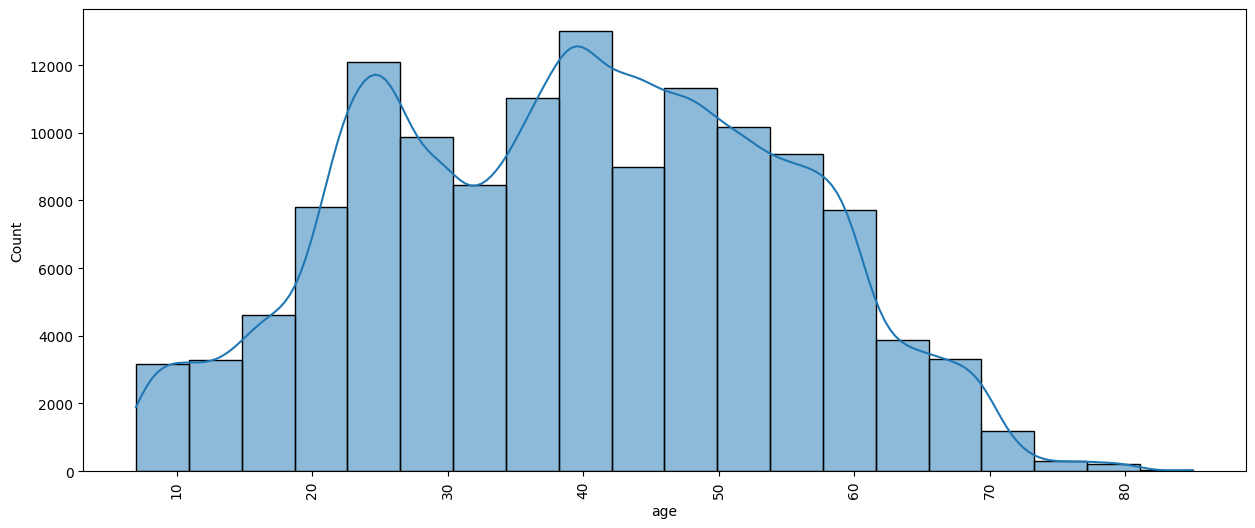

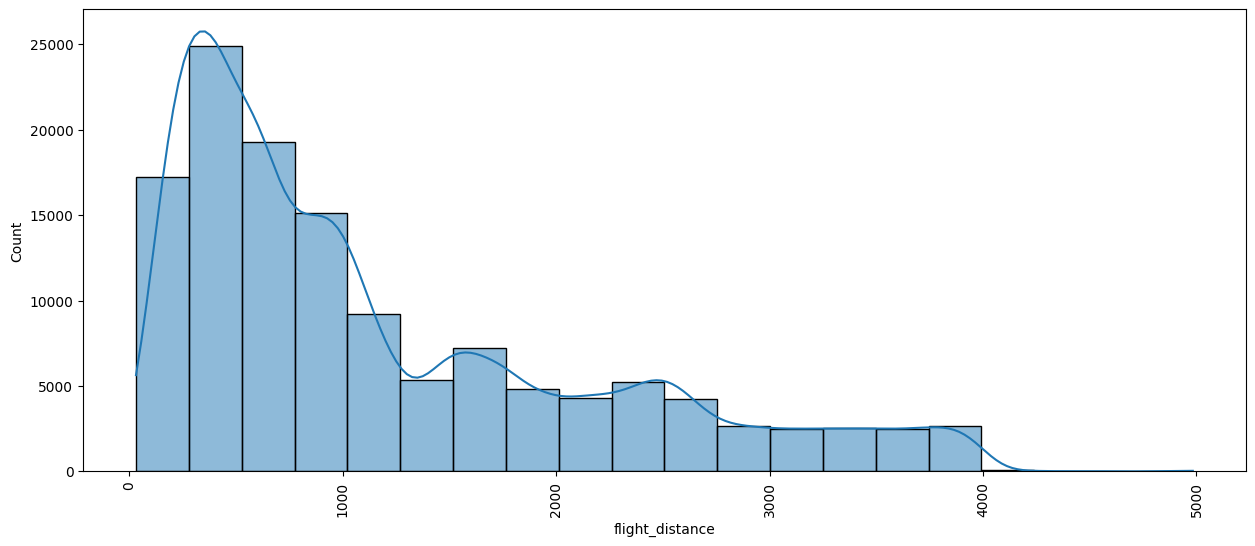

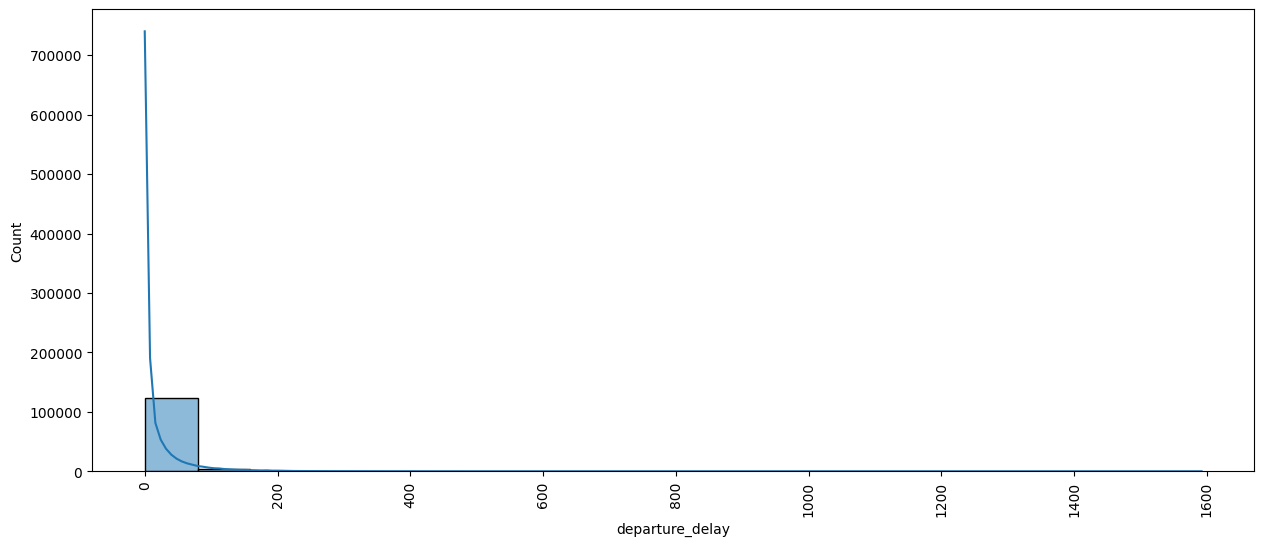

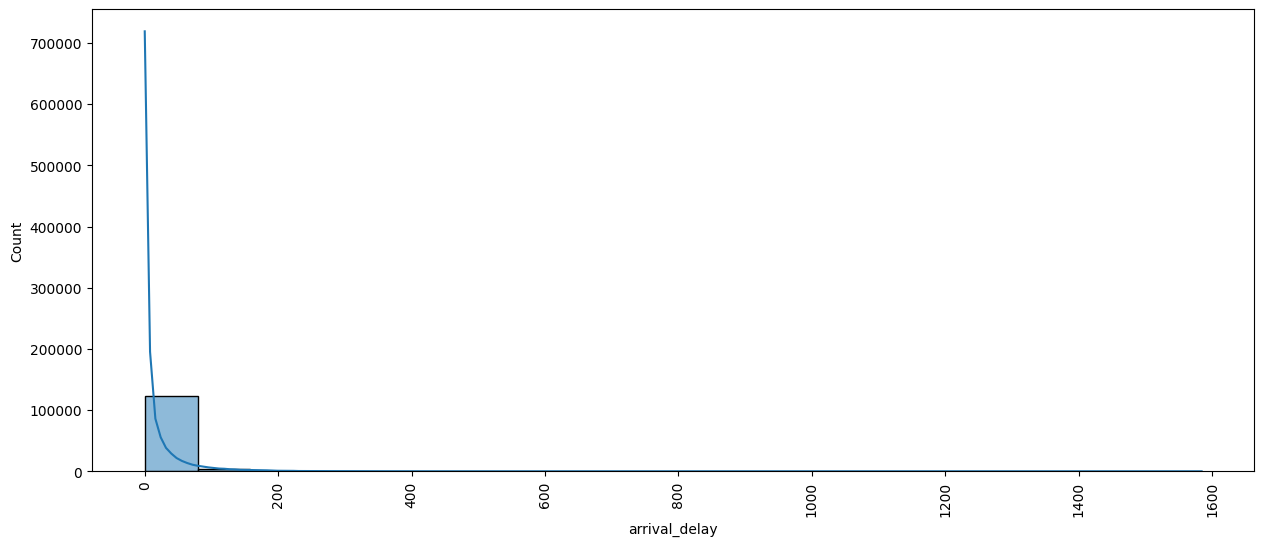

In [18]:

for i in continuous_features:
    plt.figure(figsize=(15,6))
    sns.histplot(df[i], bins=20, kde=True, palette='hls')
    plt.xticks(rotation=90)
    plt.show()
    

<div style="background-color: #f0f8ff; padding: 20px; border-radius: 5px;">
  <h3><i style="color: darkorange;"></i><strong>Interpretation of Passenger Age Distribution</strong></h3>
  <p>The provided histogram displays the distribution of the 'Age' feature among the airline passengers in the dataset.</p>
  <p><b>Key Observations:</b></p>
  <ul>
    <li>The x-axis represents the age of the passengers, ranging from approximately 7 to 85 years.</li>
    <li>The y-axis represents the count of passengers within each age group.</li>
    <li>The histogram shows several peaks, indicating age groups with a higher concentration of passengers.</li>
    <li>There appears to be a prominent peak in the age range of approximately 35 to 45 years, suggesting a large number of passengers in this demographic.</li>
    <li>Another notable peak is observed in the late 50s to early 60s age range.</li>
    <li>There's also a smaller peak around the late 20s to early 30s.</li>
    <li>The distribution shows a decrease in the number of passengers in the younger age groups (below 20) and older age groups (above 70).</li>
    <li>The overlaid curve (Kernel Density Estimate - KDE) provides a smoother representation of the age distribution, highlighting the multiple modes or peaks in the data.</li>
  </ul>
  <p><b>Interpretation:</b></p>
  <p>The age distribution of the airline passengers in this dataset is multimodal, indicating that there are several age groups that are particularly well-represented. The largest group appears to be middle-aged adults (35-45), followed by older adults (late 50s-early 60s) and younger adults (late 20s-early 30s). There are fewer very young and very old passengers in this sample.</p>
  <p><b>Implications for Analysis:</b></p>
  <ul>
    <li>Age could be a relevant factor influencing passenger satisfaction. Different age groups might have varying expectations and priorities regarding airline services.</li>
    <li>Analyzing satisfaction levels across these different age peaks could reveal valuable insights. For example, are middle-aged business travelers more or less satisfied than younger personal travelers?</li>
    <li>The machine learning model should be able to capture any non-linear relationships between age and satisfaction.</li>
    <li>The airline might tailor specific services or marketing campaigns towards these prominent age demographics.</li>
  </ul>

  <h3><i style="color: darkorange;"></i><strong>Interpretation of the Flight Distance Distribution</strong></h3>
  <p>The provided histogram with an overlaid Kernel Density Estimate (KDE) plot illustrates the distribution of 'flight_distance' (in miles) for the airline passengers in the dataset.</p>
  <p><b>Key Observations:</b></p>
  <ul>
    <li>The x-axis represents the flight distance in miles, ranging from approximately 0 to over 5000 miles.</li>
    <li>The y-axis represents the count of passengers who traveled each specific flight distance range.</li>
    <li>The distribution is positively skewed, with a significant peak at shorter flight distances (likely within the 0-1000 mile range). This indicates that a large number of passengers traveled shorter distances.</li>
    <li>There are several smaller peaks or bumps in the distribution at higher flight distances, suggesting that there are also common flight distances in the mid-range (around 1500-2500 miles) and even some longer distances (around 3000-4000 miles).</li>
    <li>The KDE curve smooths out the histogram, providing a continuous estimate of the probability density of flight distances. It clearly shows the dominant peak at shorter distances and the subsequent smaller humps at longer distances.</li>
    <li>The frequency of flights decreases as the distance increases beyond the initial peak, but there are still noticeable numbers of passengers flying longer routes.</li>
  </ul>
  <p><b>Interpretation:</b></p>
  <p>The distribution of flight distances reveals that the airline caters to a wide range of routes, with a strong emphasis on shorter flights. However, there is also a significant portion of passengers traveling medium and even long distances. The multiple peaks suggest that there might be common route lengths or hubs that contribute to these higher frequencies at specific distances.</p>

  <h3><i style="color: darkorange;"></i><strong>Interpretation of Departure Delay Distribution</strong></h3>
  <p>The provided histogram with an overlaid Kernel Density Estimate (KDE) shows the distribution of the 'Departure Delay' (in minutes) for the airline passengers in the dataset.</p>
  <p><b>Key Observations:</b></p>
  <ul>
    <li>The x-axis represents the departure delay in minutes, ranging from 0 to over 1600 minutes.</li>
    <li>The y-axis represents the count of passengers experiencing each level of departure delay.</li>
    <li>The histogram is highly skewed to the right, with a very large bar at or near zero minutes of delay. This indicates that a vast majority of flights experienced little to no departure delay.</li>
    <li>There is a long tail extending to the right, showing that while infrequent, some flights experienced significant departure delays, even exceeding 1000 minutes.</li>
    <li>The KDE curve further emphasizes this skewness, showing a very high peak at the lower end of the delay spectrum and a gradual decline as the delay increases.</li>
    <li>The scale of the y-axis is notable, with the count for near-zero delay being significantly higher than for any other delay duration.</li>
  </ul>
  <p><b>Interpretation:</b></p>
  <p>The distribution of departure delay is heavily concentrated around zero. This suggests that the airline generally operates with minimal delays for most of its flights. However, the presence of the long right tail indicates that substantial delays do occur for a smaller number of flights.</p>
  <p><b>Implications for Analysis:</b></p>
  <ul>
    <li>'Departure Delay' is likely to be a critical factor influencing passenger satisfaction. Significant delays are generally associated with negative customer experiences.</li>
    <li>The extreme skewness of this feature might require specific data preprocessing techniques if you intend to use it in a machine learning model. Transformations (e.g., logarithmic) might be considered to reduce the impact of the outliers.</li>
    <li>When analyzing the relationship between departure delay and satisfaction, it's important to consider the magnitude of the delay. A small delay might have a different impact than a delay of several hours.</li>
    <li>The airline should aim to minimize departure delays to improve customer satisfaction. Identifying the root causes of the occasional extreme delays could be particularly beneficial.</li>
  </ul>

  <h3><i style="color: darkorange;"></i><strong>Interpretation of Arrival Delay Distribution</strong></h3>
  <p>The provided histogram with an overlaid Kernel Density Estimate (KDE) shows the distribution of the 'Arrival Delay' (in minutes) for the airline passengers in the dataset.</p>
  <p><b>Key Observations:</b></p>
  <ul>
    <li>The x-axis represents the arrival delay in minutes, ranging from 0 to over 1600 minutes.</li>
    <li>The y-axis represents the count of passengers experiencing each level of arrival delay.</li>
    <li>Similar to the departure delay, the histogram for arrival delay is also highly skewed to the right, with a very large bar concentrated at or near zero minutes of delay. This indicates that most flights arrived with minimal to no delay.</li>
    <li>A long tail extends to the right, signifying that a smaller number of flights experienced significant arrival delays, reaching durations exceeding 1600 minutes.</li>
    <li>The KDE curve reinforces this pattern, showing a sharp peak at the lower end of the delay spectrum and a gradual decrease as the arrival delay increases.</li>
    <li>The scale of the y-axis highlights the vast difference in the frequency of near-zero delays compared to longer delays.</li>
  </ul>
  <p><b>Interpretation:</b></p>
  <p>The distribution of arrival delay mirrors that of departure delay, with a strong concentration of flights arriving on or very close to schedule. However, a notable number of flights experienced substantial arrival delays.</p>
  <p><b>Implications for Analysis:</b></p>
  <ul>
    <li>'Arrival Delay' is another critical factor likely to negatively impact passenger satisfaction. Passengers are sensitive to disruptions in their arrival times.</li>
    <li>The right-skewed distribution suggests the presence of outliers (flights with very long delays), which might need careful consideration during data preprocessing and modeling. Transformations could be useful.</li>
    <li>Analyzing the correlation between departure delay and arrival delay could be insightful. Are flights that depart late also more likely to arrive late?</li>
    <li>Investigating the impact of arrival delay on different customer segments (e.g., business vs. personal travelers) and travel classes could reveal varying levels of tolerance or dissatisfaction.</li>
    <li>Minimizing arrival delays is a key operational goal for the airline to enhance customer satisfaction and maintain punctuality. Understanding the causes of these delays is crucial.</li>
  </ul>
</div>

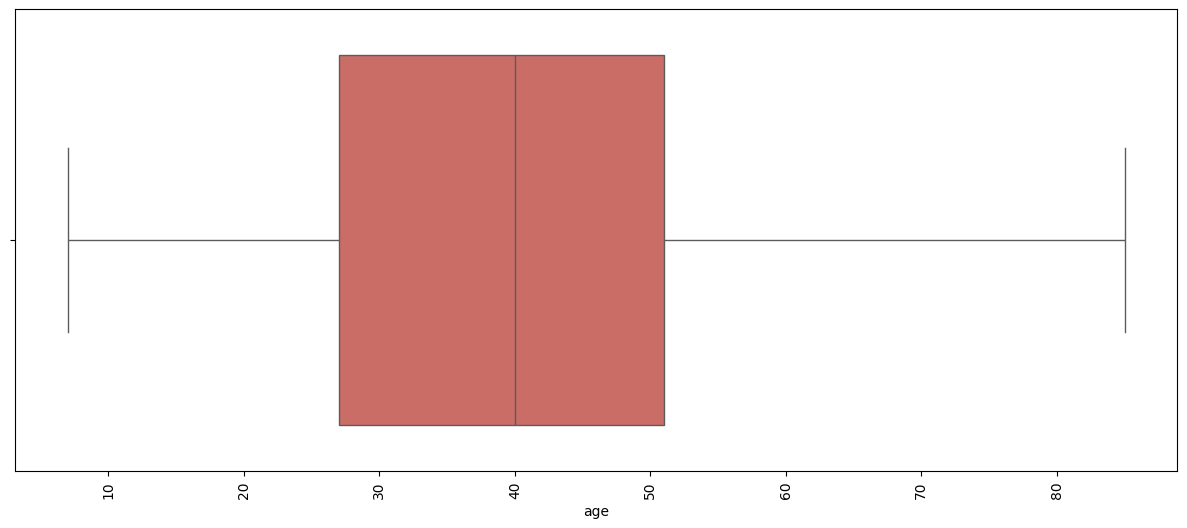

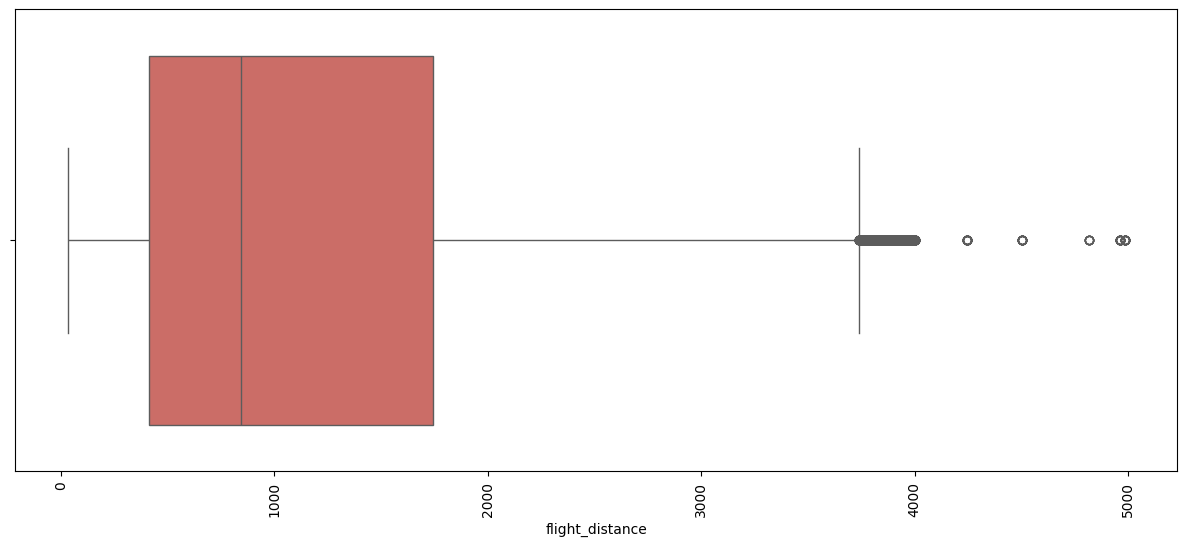

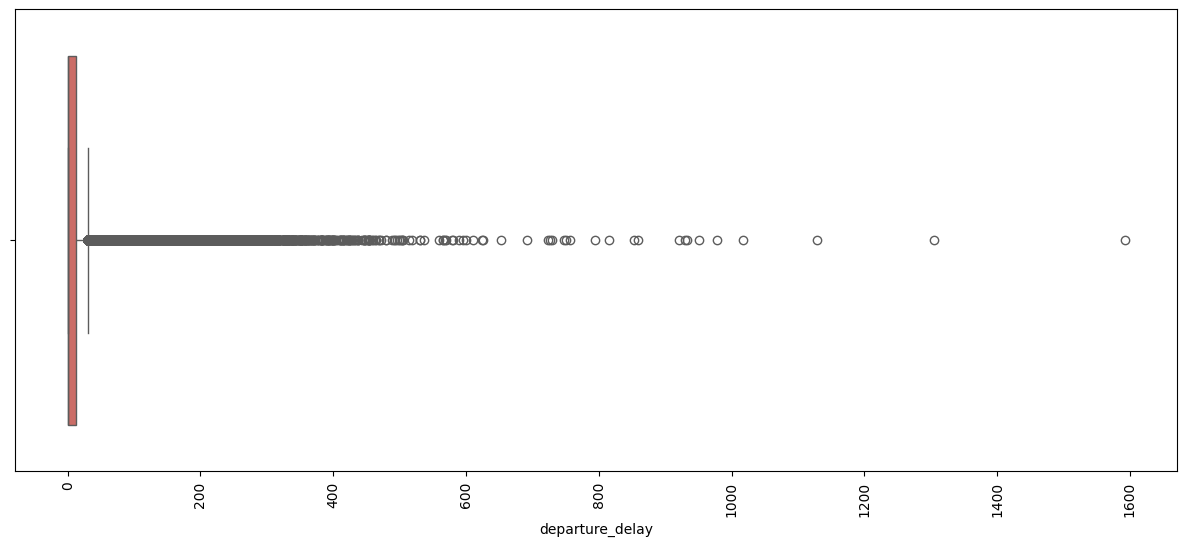

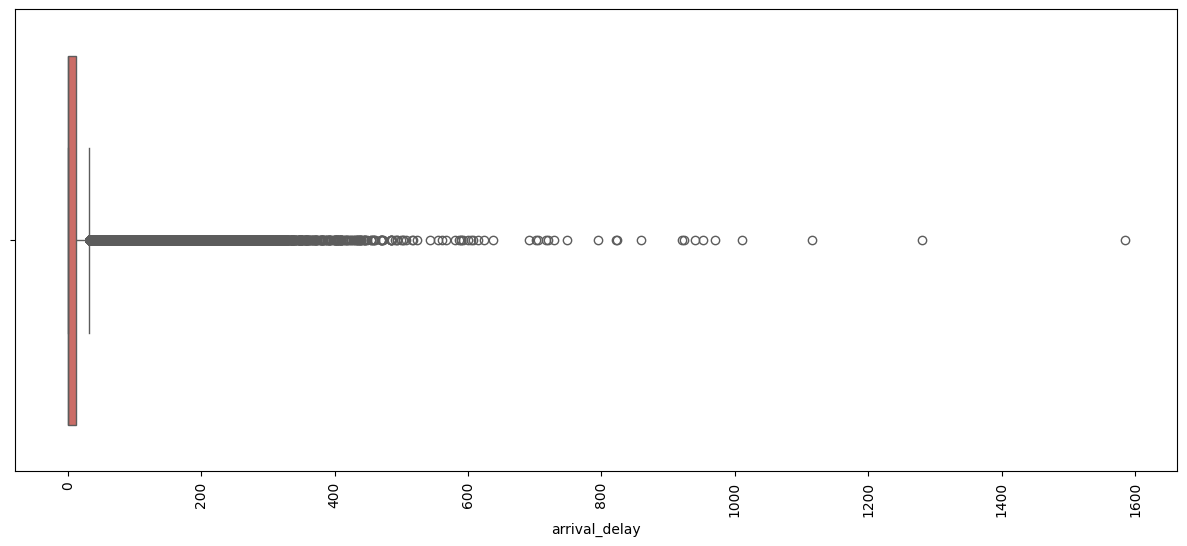

In [19]:

for i in continuous_features:
    plt.figure(figsize=(15,6))
    sns.boxplot(x=i, data=df, palette='hls')
    plt.xticks(rotation=90)
    plt.show()
    

<div style="background-color: #f0f8ff; padding: 20px; border-radius: 5px;">
  <h3><i style="color: darkorange;"></i><strong>Interpretation of Passenger Age Distribution (Box Plot)</strong></h3>
  <p>The provided box plot visualizes the distribution of the 'Age' feature among the airline passengers in the dataset. Box plots are useful for identifying the central tendency, spread, and potential outliers in a numerical variable.</p>
  <p><b>Key Observations:</b></p>
  <ul>
    <li>The box itself represents the interquartile range (IQR), containing the middle 50% of the data. The bottom edge of the box corresponds to the 25th percentile (Q1), and the top edge corresponds to the 75th percentile (Q3).</li>
    <li>The line inside the box represents the median (50th percentile) of the age distribution. It appears to be around the early to mid-40s.</li>
    <li>The whiskers extend from the edges of the box to show the spread of the remaining data, typically within 1.5 times the IQR.</li>
    <li>The left whisker extends down to approximately the early teens (around 10-15 years).</li>
    <li>The right whisker extends up to approximately the late 60s to early 70s (around 70-75 years).</li>
    <li>There are no individual points plotted outside the whiskers, which suggests that there are no significant outliers in the 'Age' distribution based on the standard 1.5 * IQR rule.</li>
  </ul>
  <p><b>Interpretation:</b></p>
  <p>The box plot indicates that the central 50% of the passenger ages lie between the late 20s/early 30s and the early to mid-50s. The median age is in the early to mid-40s. The overall spread of the age data, excluding potential outliers, ranges from the early teens to the early 70s.</p>

  <h3><i style="color: darkorange;"></i><strong>Interpretation of Flight Distance Distribution (Box Plot)</strong></h3>
  <p>The provided horizontal box plot visualizes the distribution of the 'Flight Distance' (in miles) for the airline passengers in the dataset.</p>
  <p><b>Key Observations:</b></p>
  <ul>
    <li>The box represents the interquartile range (IQR), containing the middle 50% of the flight distances. The left edge of the box is around 200-300 miles (Q1), and the right edge is around 1700-1800 miles (Q3).</li>
    <li>The line inside the box represents the median flight distance, which appears to be around 800-900 miles.</li>
    <li>The left whisker extends to a very short flight distance, close to 0 miles, indicating the lower range of non-outlier flight distances.</li>
    <li>The right whisker extends to approximately 3500-3600 miles, indicating the upper range of non-outlier flight distances.</li>
    <li>There are several individual points plotted to the right of the right whisker. These represent outliers, indicating a number of flights with significantly longer distances, ranging from around 4000 to over 5000 miles.</li>
  </ul>
  <p><b>Interpretation:</b></p>
  <p>The box plot shows that the majority of flights in the dataset cover shorter to medium distances, with the central 50% of flights ranging between approximately 200 to 1800 miles. The median flight distance is around 800-900 miles. The presence of outliers indicates that while less frequent, there are also a number of long-haul flights in the data.</p>

  <h3><i style="color: darkorange;"></i><strong>Interpretation of Departure Delay Distribution (Box Plot)</strong></h3>
  <p>The provided box plot visualizes the distribution of the 'Departure Delay' (in minutes) for the airline passengers in the dataset. This horizontal box plot is particularly useful for highlighting the skewness and outliers in the data.</p>
  <p><b>Key Observations:</b></p>
  <ul>
    <li>The box itself is very narrow and located at the lower end of the x-axis, close to zero. This indicates that the interquartile range (IQR), containing the middle 50% of the departure delays, is very small and concentrated around low delay values.</li>
    <li>The line inside the box, representing the median departure delay, is also very close to zero. This confirms that the typical departure delay is minimal.</li>
    <li>The left whisker extends to a very small negative value or close to zero, indicating the lower range of non-outlier delays.</li>
    <li>The right whisker extends to a much larger positive value, suggesting a significant spread in the higher end of the non-outlier delays, although still relatively small compared to the extreme values.</li>
    <li>Numerous individual points are plotted to the right of the right whisker. These represent outliers, indicating a substantial number of flights with significant departure delays, ranging from a few hundred minutes to over 1600 minutes.</li>
  </ul>
  <p><b>Interpretation:</b></p>
  <p>The box plot clearly illustrates the highly right-skewed distribution of departure delay observed in the histogram. The vast majority of flights experience very little departure delay, as indicated by the narrow box and the median being close to zero. However, there is a considerable number of outliers, representing flights with substantial delays. These outliers are spread across a wide range of delay times.</p>

<h3><i style="color: darkorange;"></i><strong>Interpretation of Arrival Delay Distribution (Box Plot)</strong></h3>
  <p>The provided box plot visualizes the distribution of the 'Arrival Delay' (in minutes) for the airline passengers in the dataset. Similar to the departure delay box plot, this horizontal representation helps to highlight the skewness and potential outliers.</p>
  <p><b>Key Observations:</b></p>
  <ul>
    <li>The box itself is very narrow and positioned at the lower end of the x-axis, close to zero. This indicates that the interquartile range (IQR), encompassing the middle 50% of the arrival delays, is minimal and concentrated around low delay values.</li>
    <li>The line inside the box, representing the median arrival delay, is also very close to zero, signifying that the typical arrival delay is very short.</li>
    <li>The left whisker extends to a small negative value or very close to zero, indicating the lower range of non-outlier arrival delays.</li>
    <li>The right whisker extends to a larger positive value compared to the IQR, showing a spread in the higher end of non-outlier delays, though still relatively small compared to the extreme values.</li>
    <li>Numerous individual points are plotted to the right of the right whisker. These represent outliers, indicating a significant number of flights with substantial arrival delays, ranging from several hundred minutes to over 1600 minutes.</li>
  </ul>
  <p><b>Interpretation:</b></p>
  <p>The box plot confirms the highly right-skewed distribution of arrival delay, consistent with the histogram. The majority of flights experience very little arrival delay, as shown by the narrow box and the median near zero. However, a considerable number of flights are associated with significant arrival delays, represented by the numerous outliers extending far to the right.</p>
  
</div>

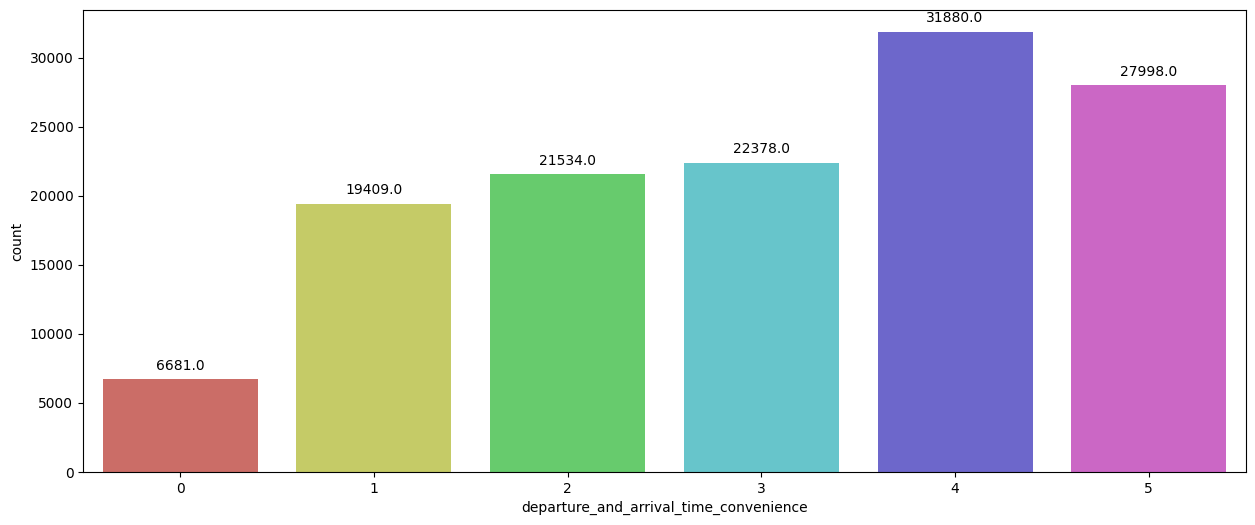

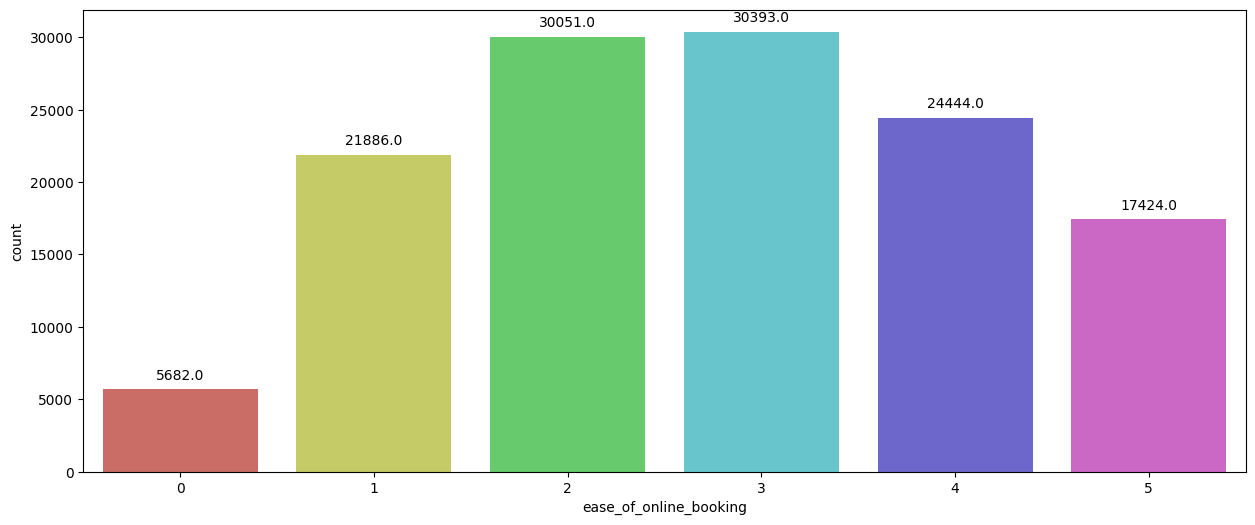

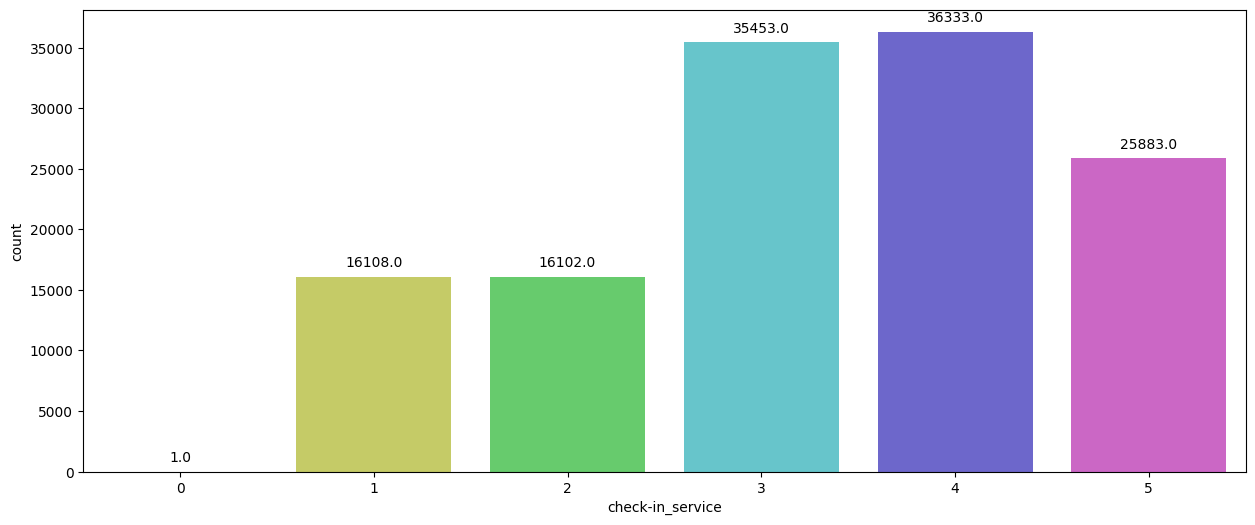

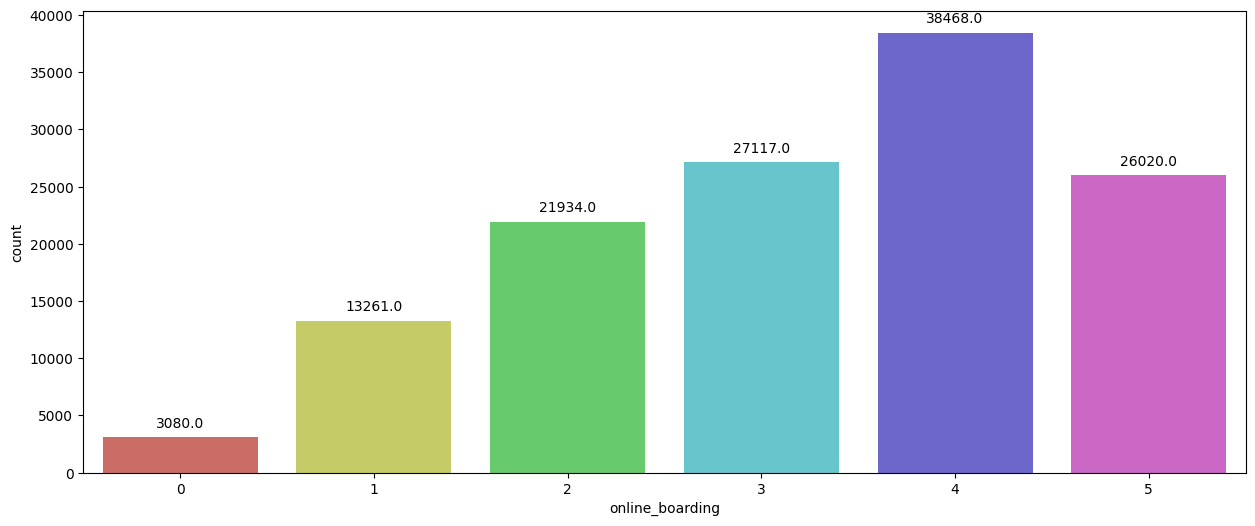

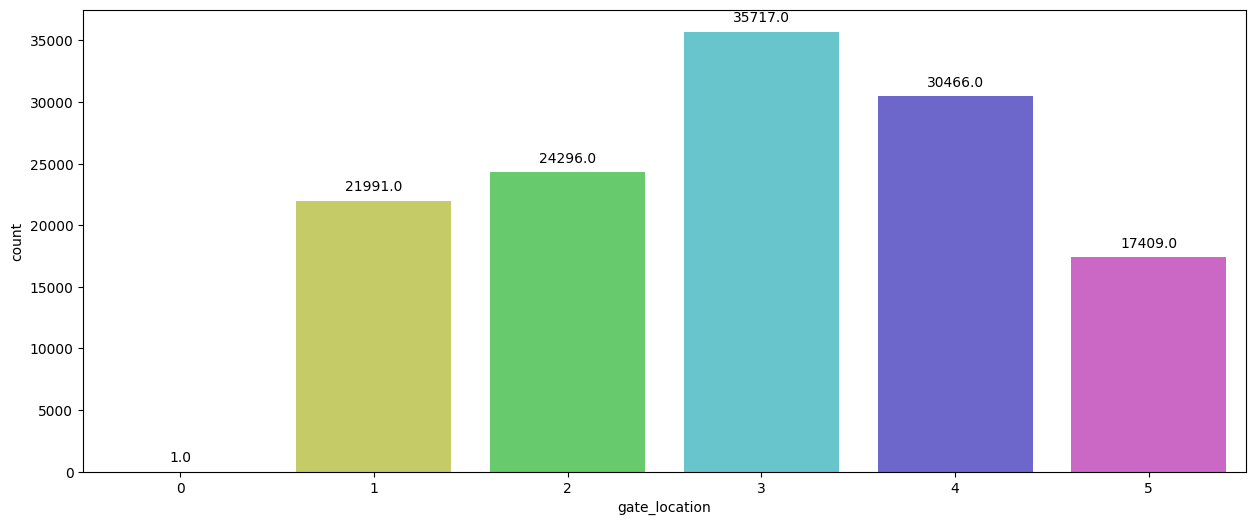

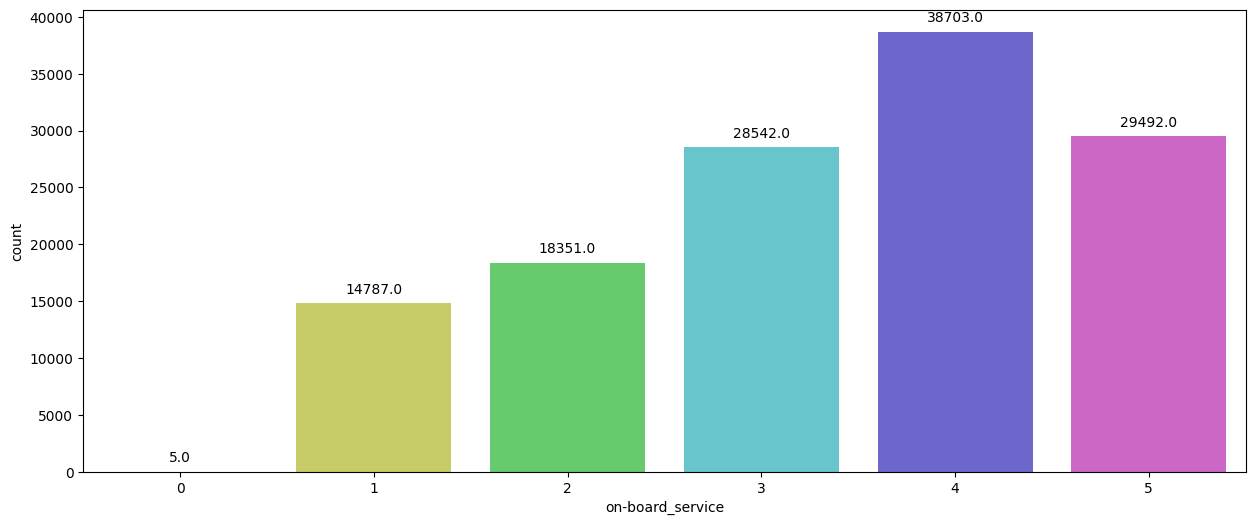

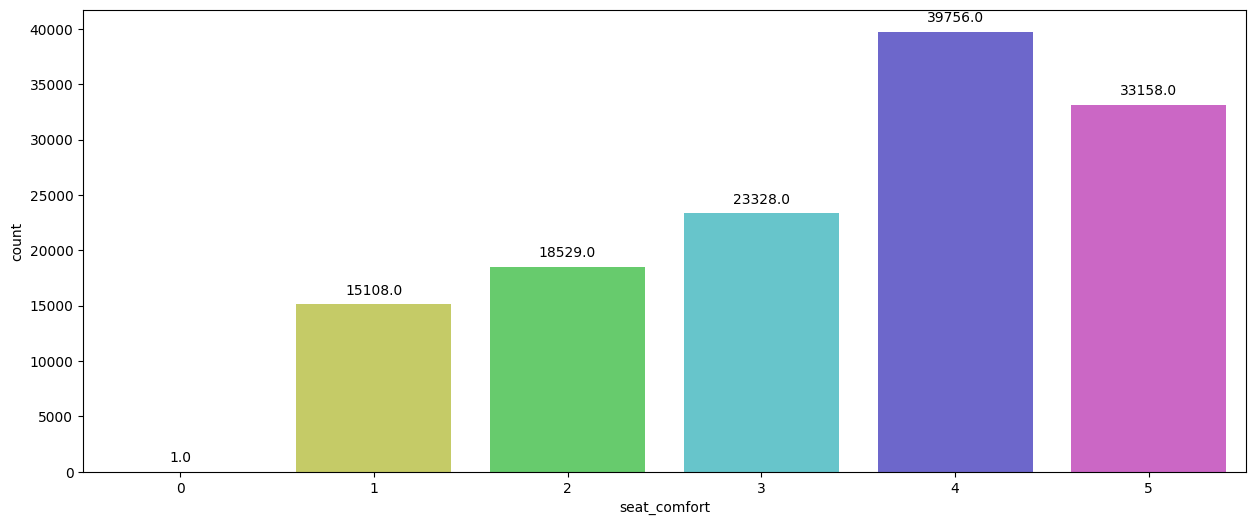

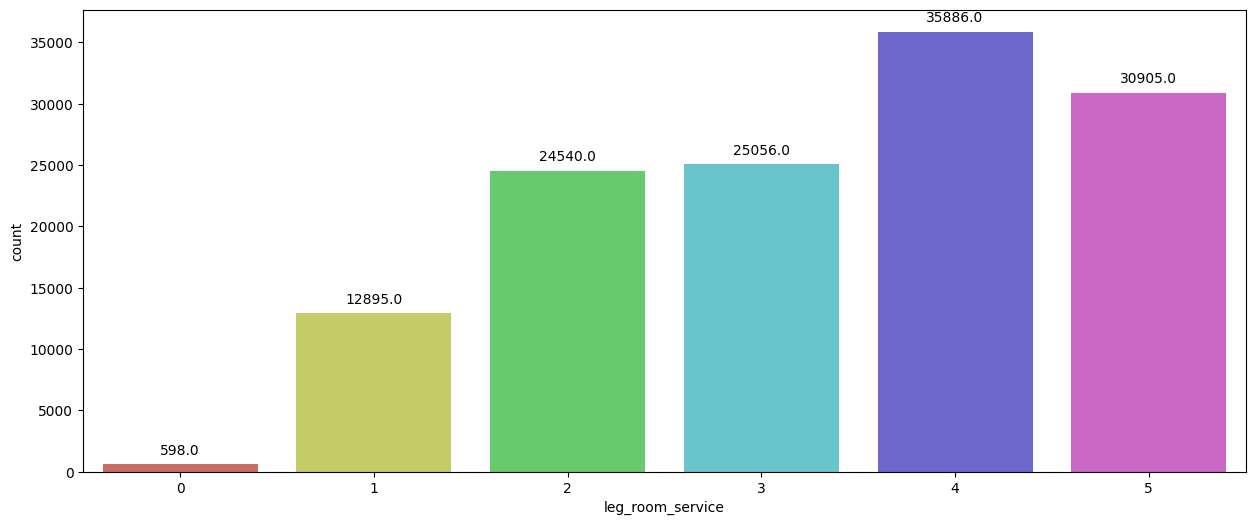

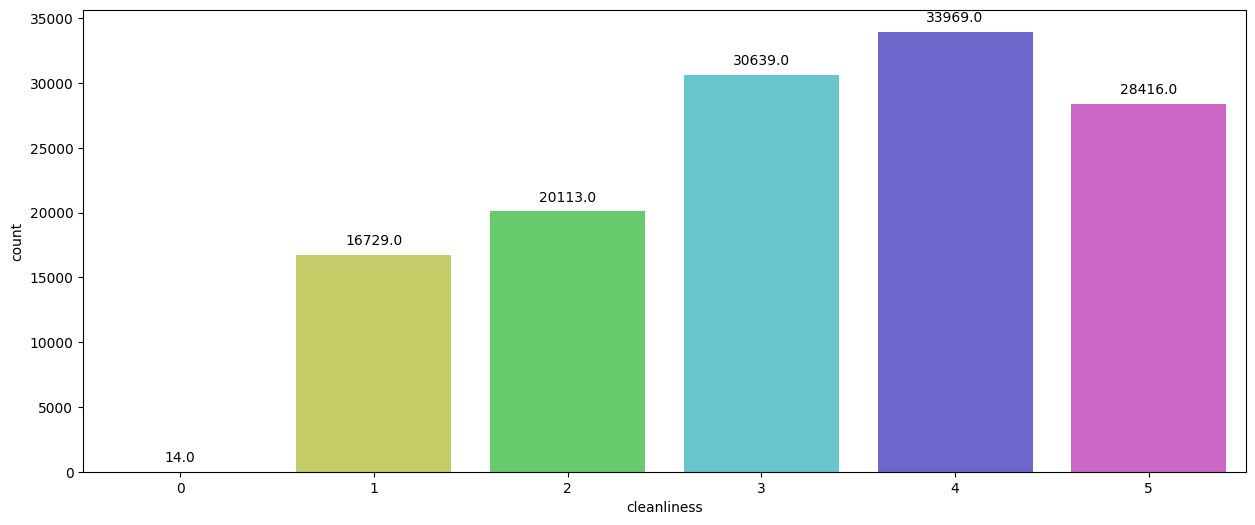

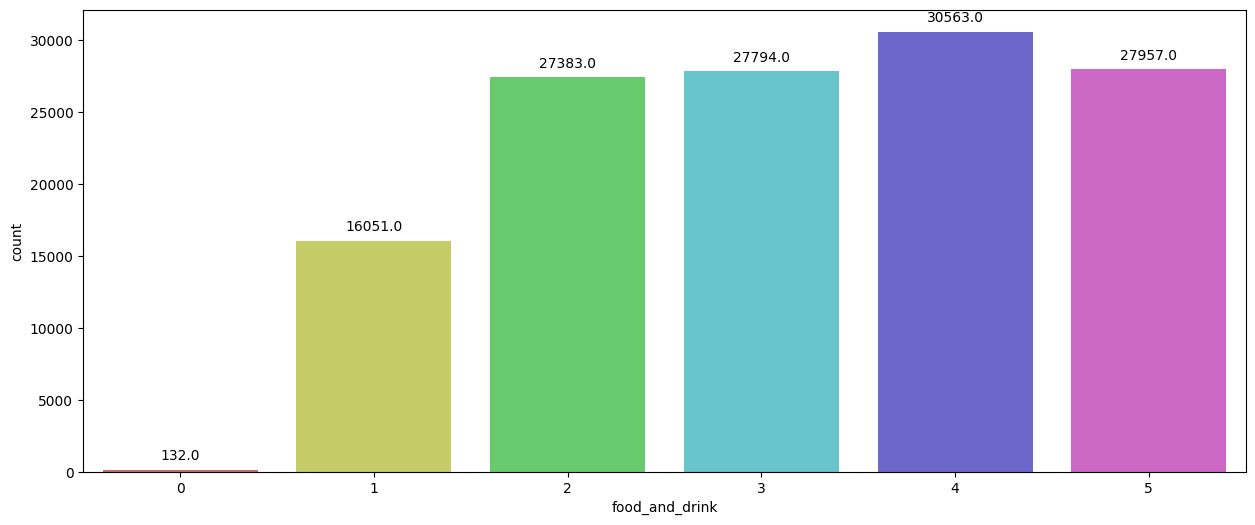

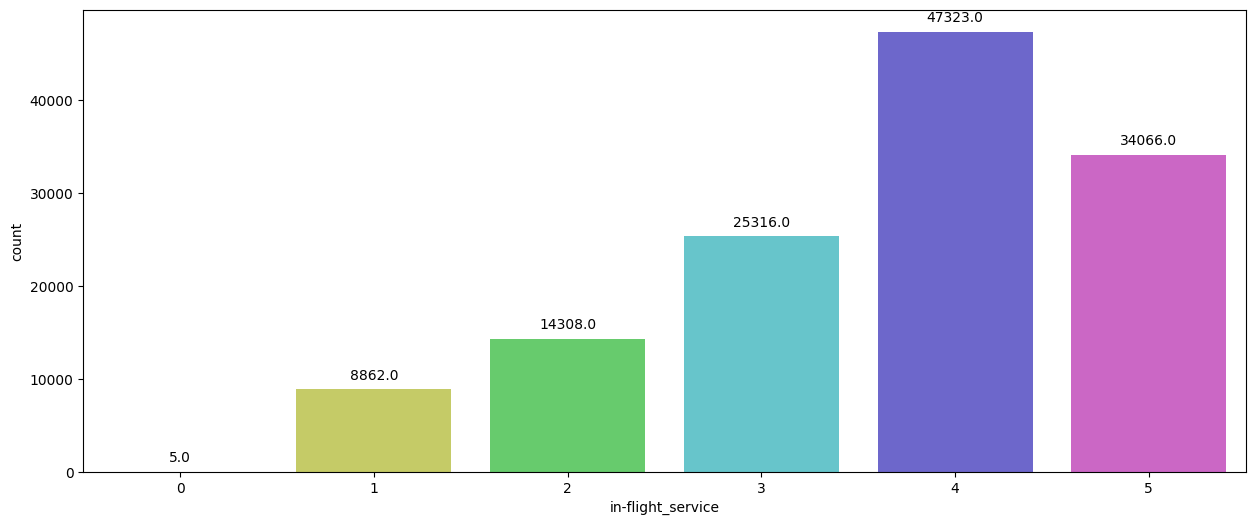

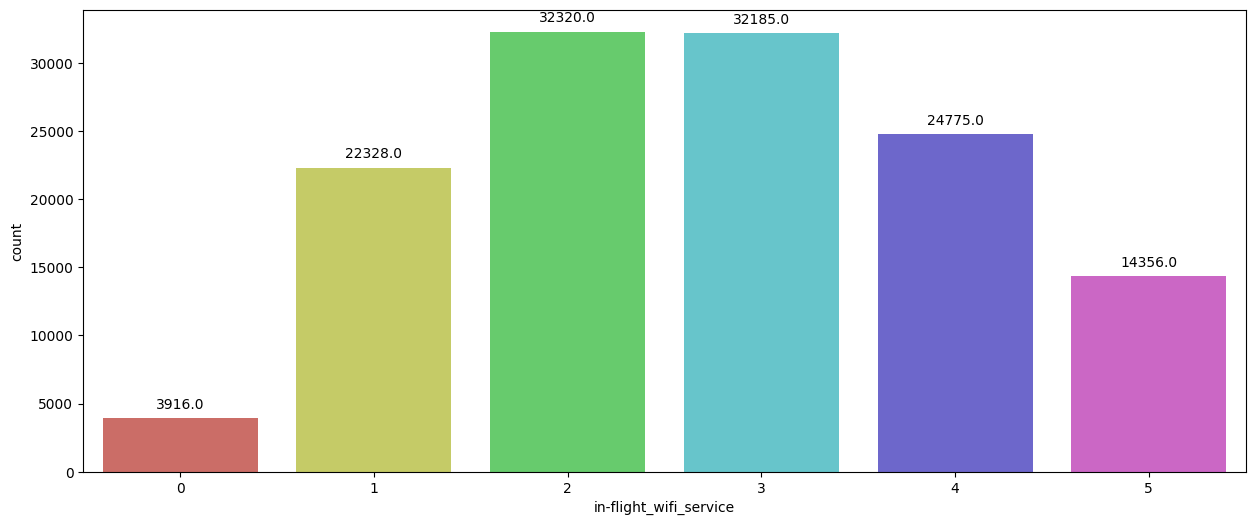

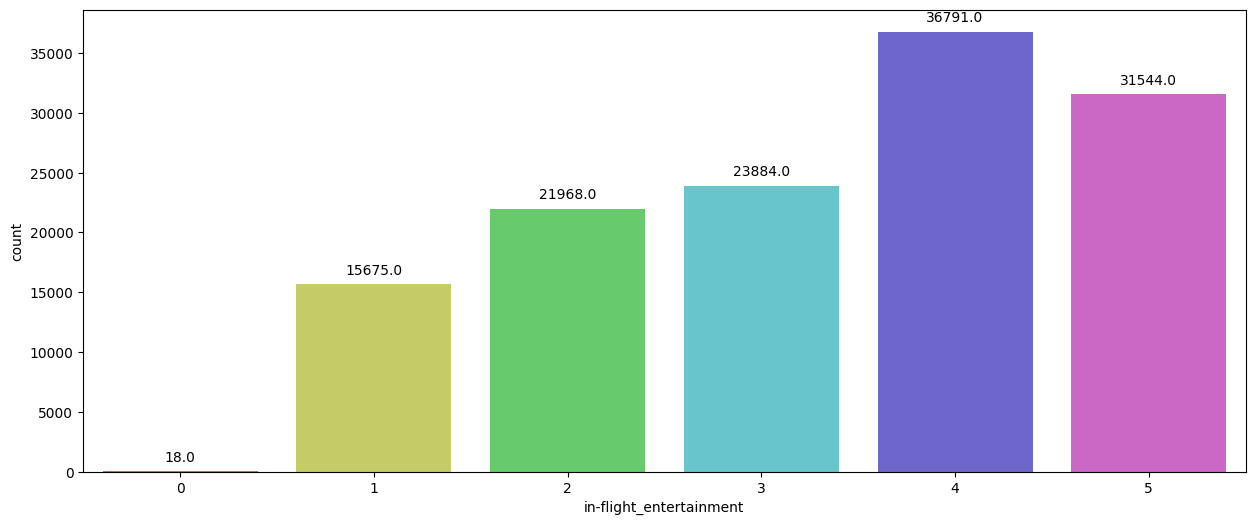

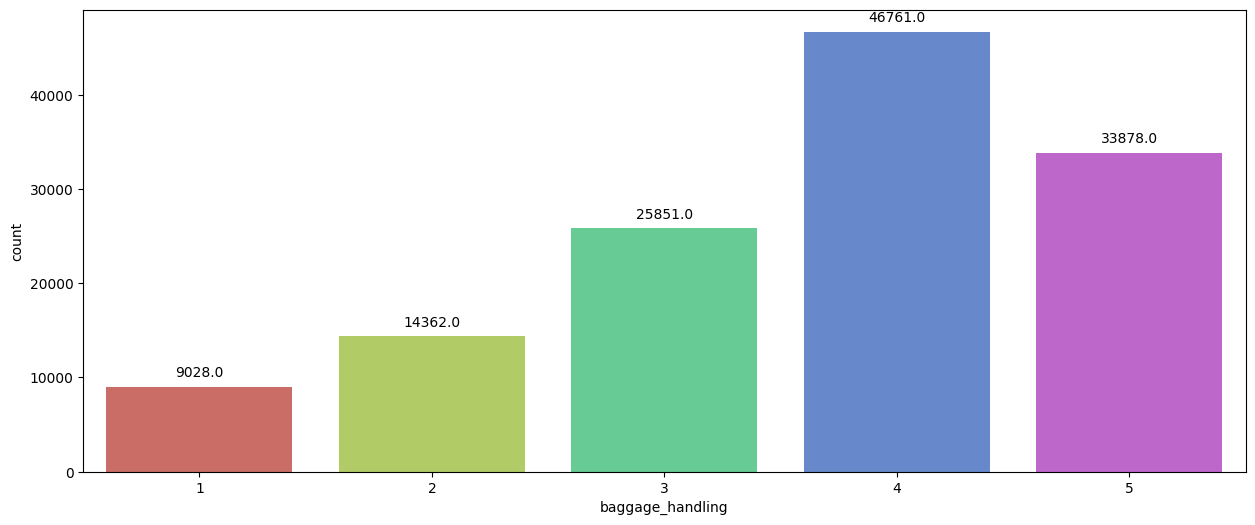

In [20]:

for i in discrete_features:
    plt.figure(figsize=(15,6))
    ax = sns.countplot(x=i, data=df, palette='hls')
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f"{height}", 
                    xy=(p.get_x() + p.get_width() / 2., height), 
                    xytext = (0,10), 
        textcoords="offset points",
        ha="center", va="center")
    plt.show()
    

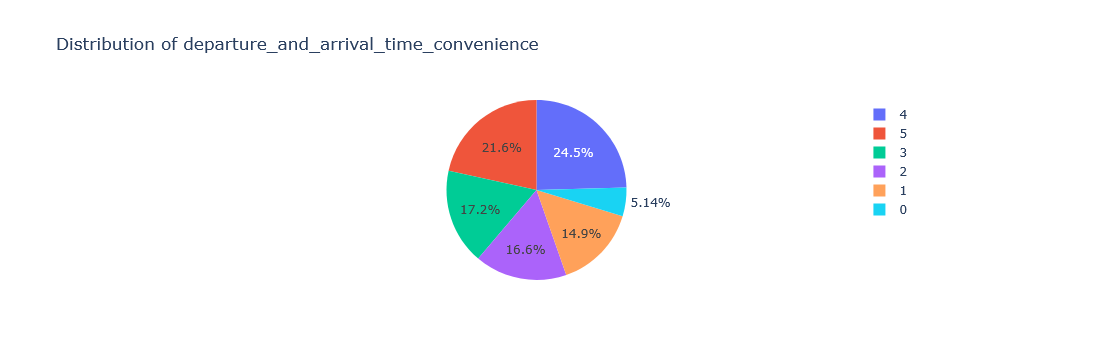

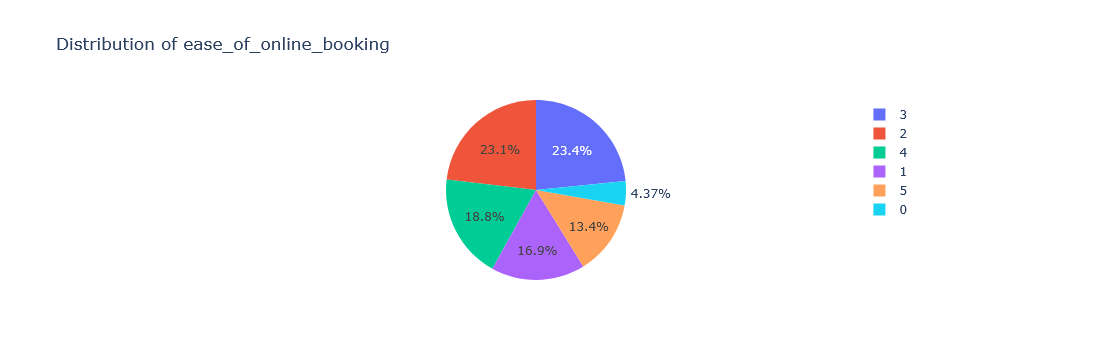

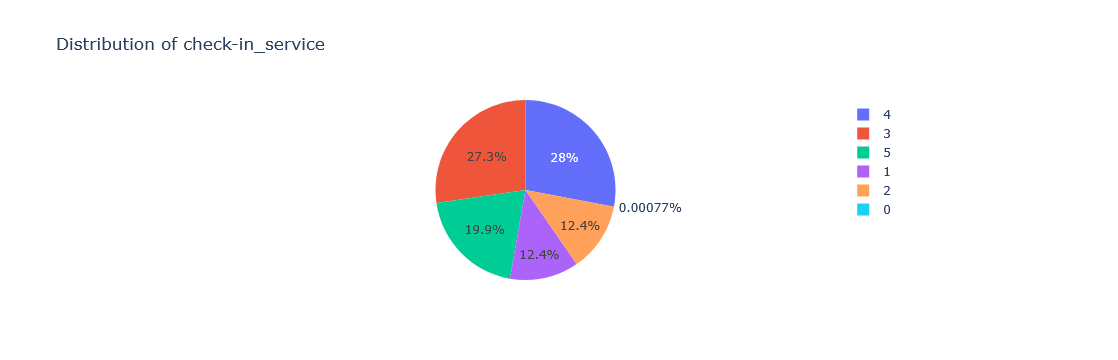

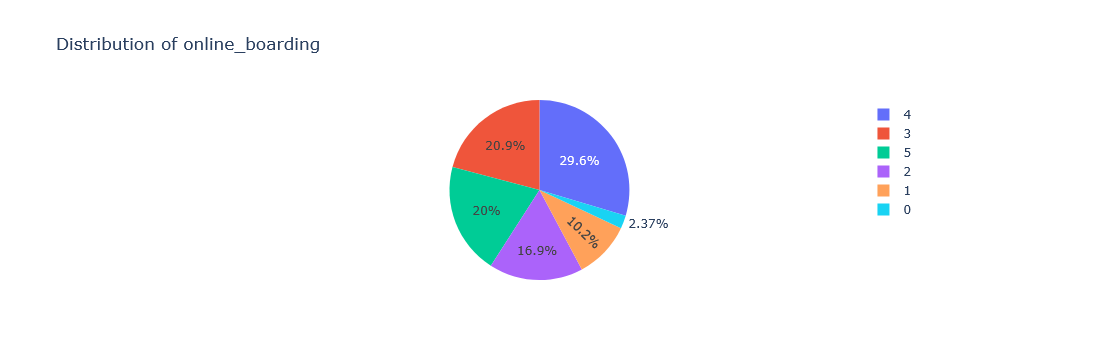

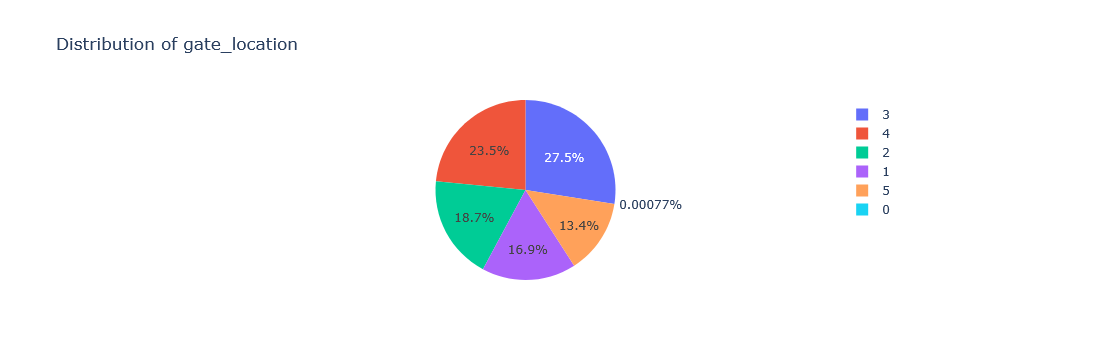

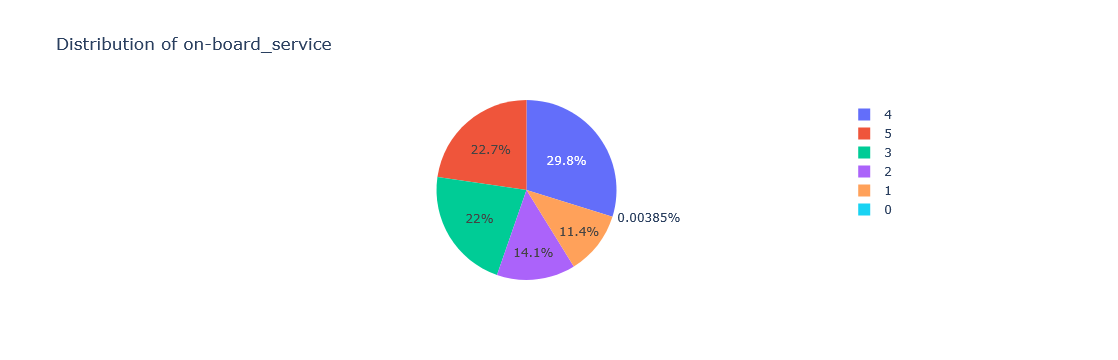

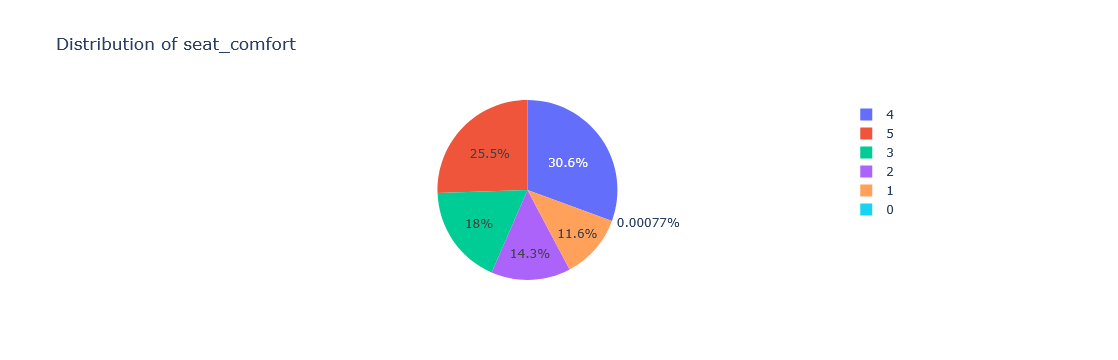

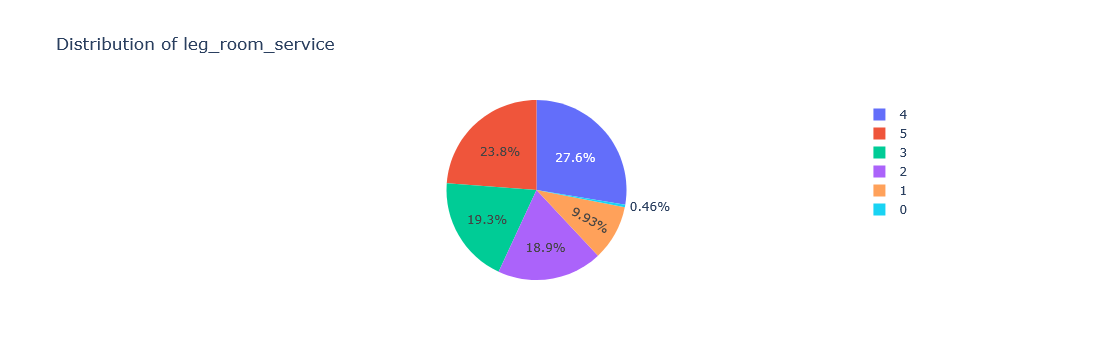

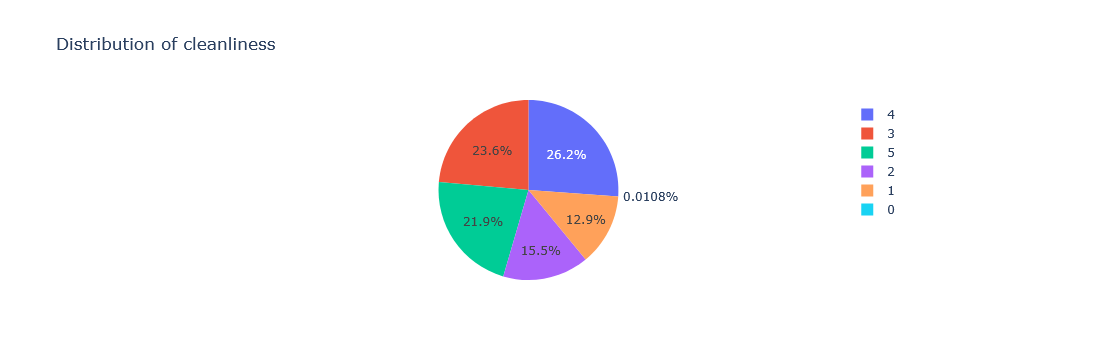

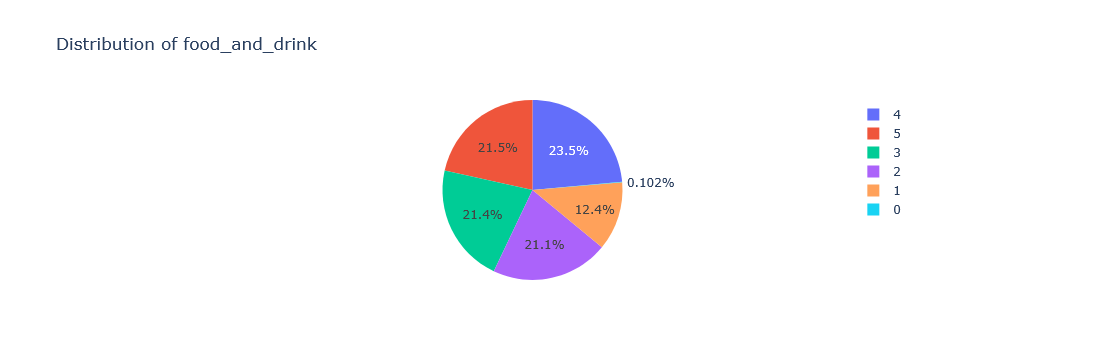

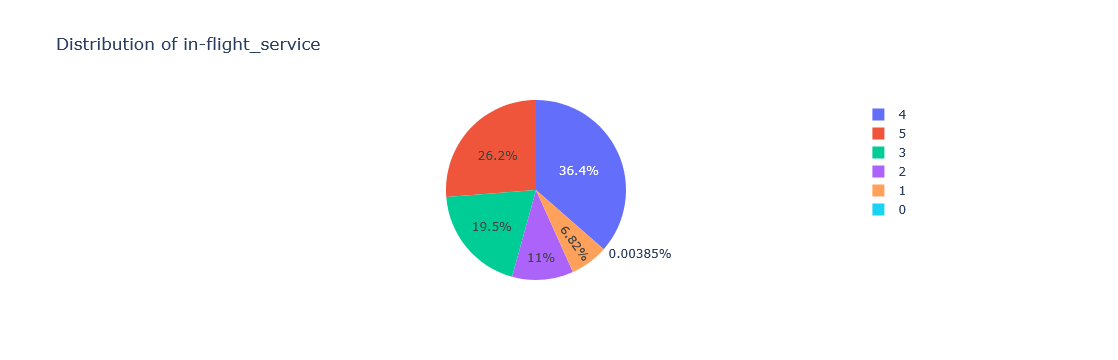

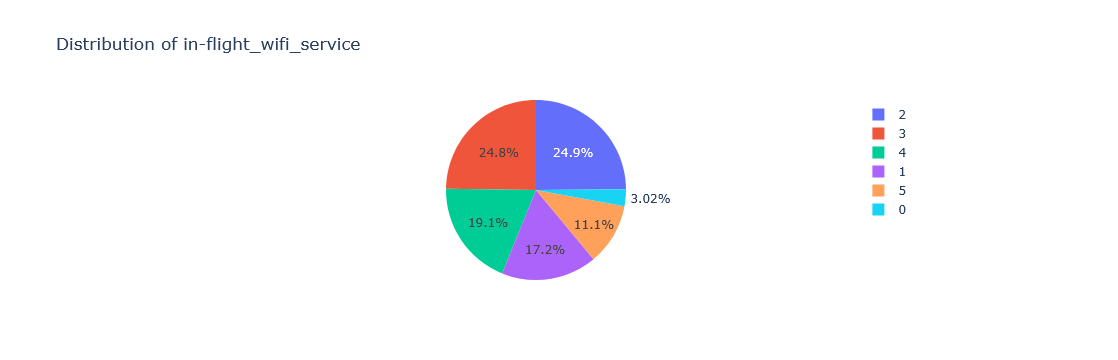

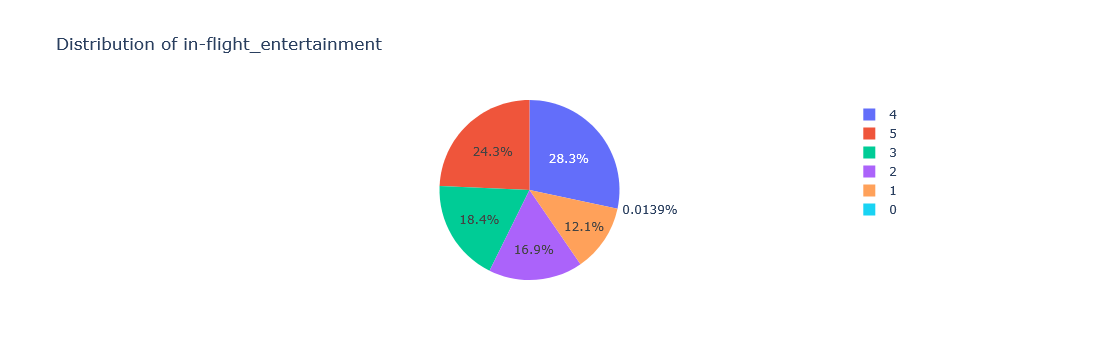

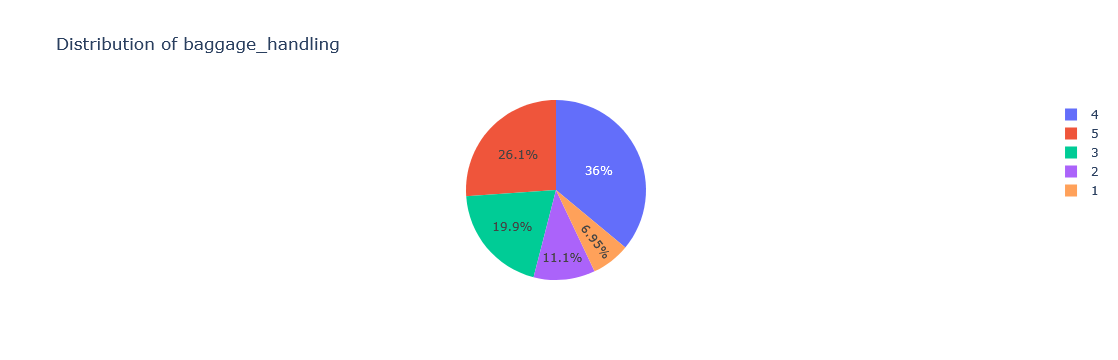

In [21]:

for i in discrete_features:
    counts = df[i].value_counts()
    fig = px.pie(counts, values=counts.values, names=counts.index, title=f"Distribution of {i}")
    fig.show()
    

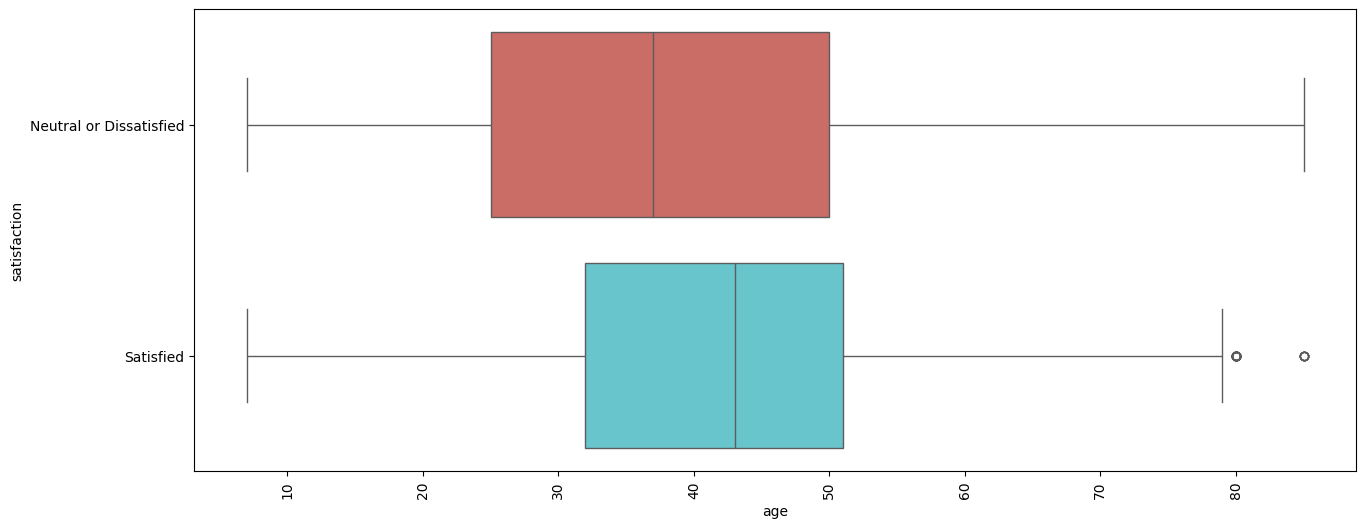

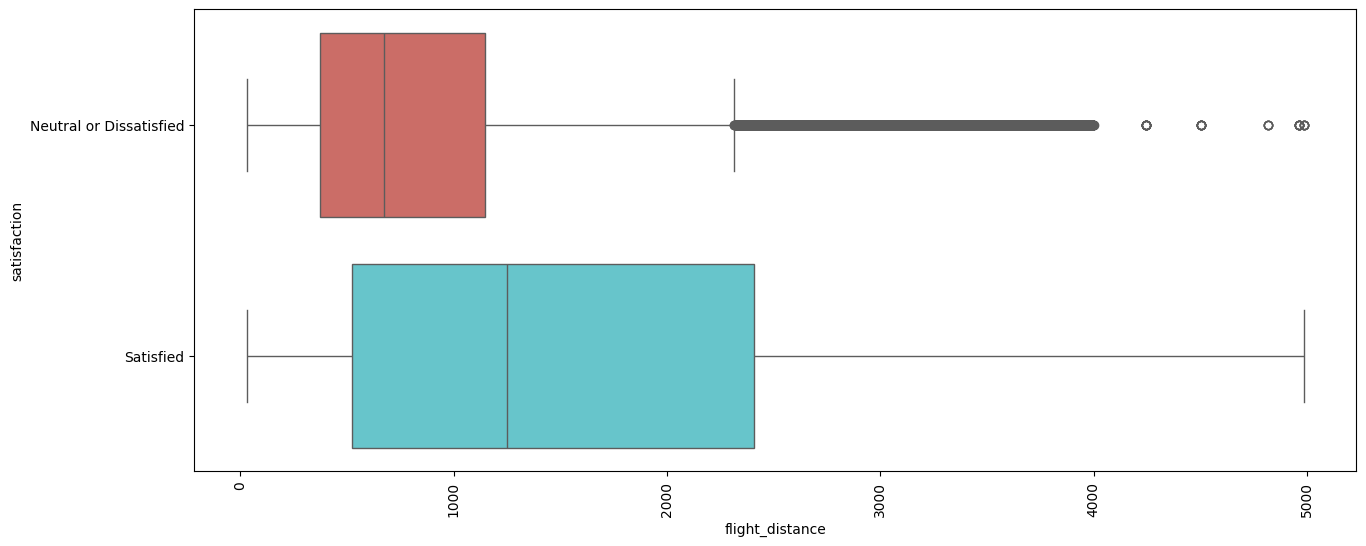

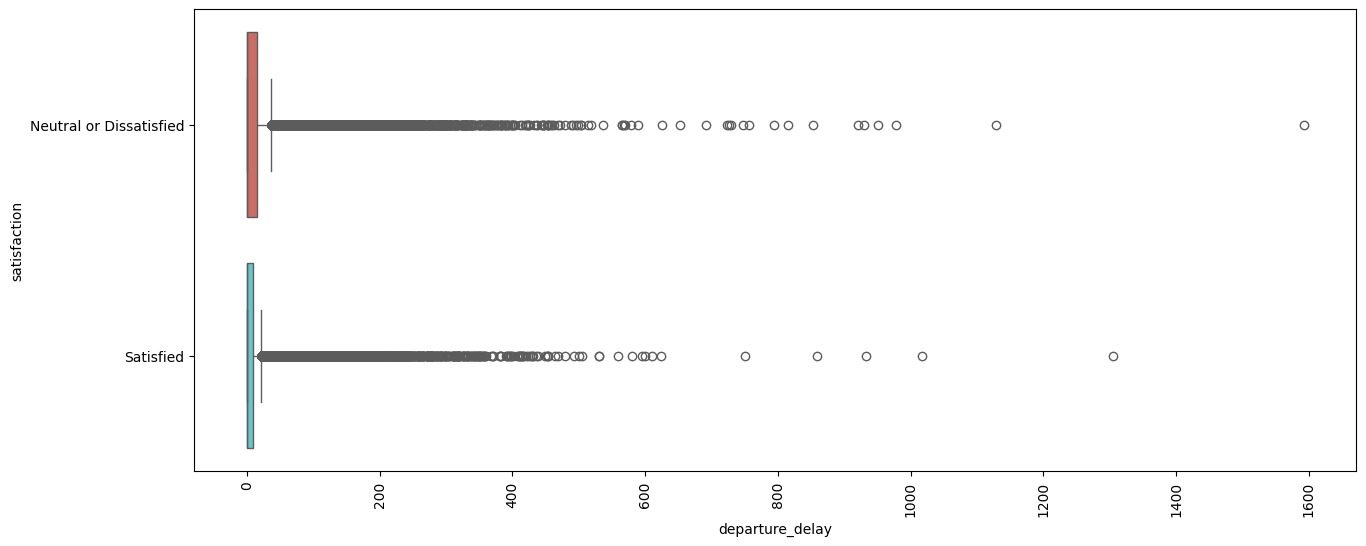

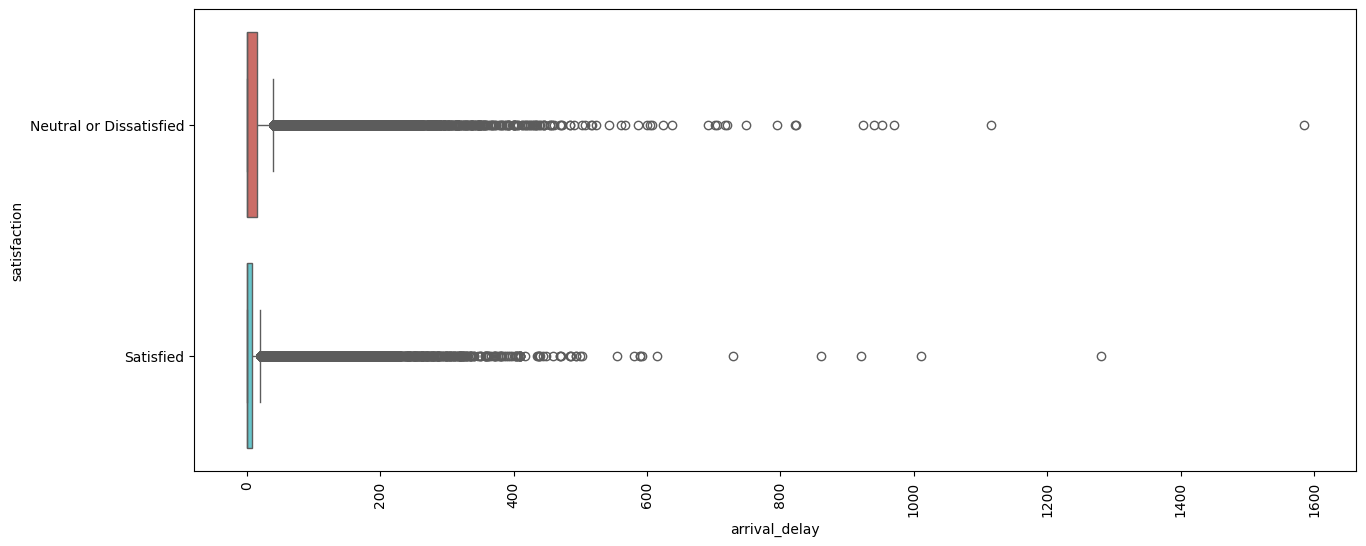

In [22]:

for i in continuous_features:
    plt.figure(figsize=(15,6))
    sns.boxplot(x=i,y='satisfaction',data=df, palette='hls')
    plt.xticks(rotation=90)
    plt.show()
    

<div style="background-color: #f0f8ff; padding: 20px; border-radius: 5px;">
  <h3><i style="color: darkorange;"></i><strong>Interpretation of Age Distribution by Satisfaction Level</strong></h3>
  <p>The provided horizontal box plot compares the distribution of the 'Age' feature for passengers who are 'Satisfied' versus those who are 'Neutral or Dissatisfied'. This allows us to see if there are any age-related patterns in customer satisfaction.</p>
  <p><b>Key Observations:</b></p>
  <ul>
    <li>There are two box plots, one for 'Neutral or Dissatisfied' passengers (top, in red) and one for 'Satisfied' passengers (bottom, in cyan).</li>
    <li><b>Neutral or Dissatisfied Passengers:</b>
      <ul>
        <li>The box extends from approximately age 30 to 50, indicating that the middle 50% of this group falls within this age range.</li>
        <li>The median age for this group (the line inside the box) appears to be around the early 40s.</li>
        <li>The whiskers extend from roughly age 10 to 80, showing the spread of ages for this group, with no apparent outliers.</li>
      </ul>
    </li>
    <li><b>Satisfied Passengers:</b>
      <ul>
        <li>The box extends from approximately age 25 to 48, indicating that the middle 50% of this group is slightly younger compared to the 'Neutral or Dissatisfied' group.</li>
        <li>The median age for this group appears to be around the late 30s to early 40s, slightly lower than the 'Neutral or Dissatisfied' group.</li>
        <li>The whiskers extend from roughly age 7 to 80, showing a similar overall age spread. There are a couple of potential outliers at the higher end of the age range (around 80).</li>
      </ul>
    </li>
  </ul>
  <p><b>Interpretation:</b></p>
  <p>The box plots suggest that, on average, satisfied passengers tend to be slightly younger than neutral or dissatisfied passengers. The median age for satisfied passengers is a bit lower, and the interquartile range also skews slightly towards younger ages. However, the overall age ranges for both groups are quite broad, and there's a significant overlap in their age distributions.</p>
</div>

<div style="background-color: #f0f8ff; padding: 20px; border-radius: 5px;">
  <h3><i style="color: darkorange;"></i><strong>Interpretation of Flight Distance Distribution by Satisfaction Level</strong></h3>
  <p>The provided horizontal box plot compares the distribution of 'Flight Distance' (in miles) for passengers who are 'Satisfied' versus those who are 'Neutral or Dissatisfied'. This helps visualize if flight distance is related to customer satisfaction.</p>
  <p><b>Key Observations:</b></p>
  <ul>
    <li>There are two box plots, one for 'Neutral or Dissatisfied' passengers (top, in red) and one for 'Satisfied' passengers (bottom, in cyan).</li>
    <li><b>Neutral or Dissatisfied Passengers:</b>
      <ul>
        <li>The box extends from approximately 200 to 1200 miles, indicating the middle 50% of flight distances for this group.</li>
        <li>The median flight distance (the line inside the box) is around 600-700 miles.</li>
        <li>The right whisker extends to around 4000 miles, with several outliers beyond this, indicating some very long flights among this group.</li>
        <li>The left whisker extends to a very short distance, near 0.</li>
      </ul>
    </li>
    <li><b>Satisfied Passengers:</b>
      <ul>
        <li>The box extends from approximately 500 to 2500 miles, indicating the middle 50% of flight distances for this group are generally longer than the 'Neutral or Dissatisfied' group.</li>
        <li>The median flight distance is around 1400-1500 miles, notably higher than the 'Neutral or Dissatisfied' group.</li>
        <li>The right whisker extends to the maximum distance in the data (around 5000 miles), with fewer noticeable outliers compared to the 'Neutral or Dissatisfied' group.</li>
        <li>The left whisker extends to a very short distance, near 0.</li>
      </ul>
    </li>
  </ul>
  <p><b>Interpretation:</b></p>
  <p>The box plots suggest a potential relationship between flight distance and satisfaction. Satisfied passengers tend to travel longer distances on average compared to neutral or dissatisfied passengers. The median flight distance for satisfied passengers is significantly higher, and their interquartile range also skews towards longer distances.</p>
</div>

<div style="background-color: #f0f8ff; padding: 20px; border-radius: 5px;">
  <h3><i style="color: darkorange;"></i><strong>Interpretation of Departure and Arrival Delay Distributions by Satisfaction Level (Combined)</strong></h3>
  <p>The combined horizontal box plot displays the distribution of both 'Departure Delay' (top) and 'Arrival Delay' (bottom) in minutes, separated by passenger satisfaction level ('Satisfied' vs. 'Neutral or Dissatisfied'). This allows for a direct comparison of how these two delay types relate to customer satisfaction.</p>
  <p><b>Key Observations:</b></p>
  <ul>
    <li><b>Departure Delay (Top Box Plot):</b>
      <ul>
        <li>For both 'Neutral or Dissatisfied' (red) and 'Satisfied' (cyan) passengers, the boxes representing the interquartile range are very narrow and located near zero, indicating that the middle 50% of flights experienced minimal departure delays for both groups.</li>
        <li>The medians for both groups are also very close to zero.</li>
        <li>However, the 'Neutral or Dissatisfied' group shows a much larger number of outliers extending to the right, indicating significantly longer and more frequent substantial departure delays compared to the 'Satisfied' group.</li>
        <li>The maximum outlier value appears higher for the 'Neutral or Dissatisfied' group.</li>
      </ul>
    </li>
    <li><b>Arrival Delay (Bottom Box Plot):</b>
      <ul>
        <li>Similar to departure delay, the boxes for both satisfaction levels are narrow and near zero, with medians also close to zero, suggesting minimal typical arrival delays for both groups.</li>
        <li>Again, the 'Neutral or Dissatisfied' group exhibits a greater number of outliers with larger values for arrival delay compared to the 'Satisfied' group.</li>
        <li>The spread of the outliers for 'Neutral or Dissatisfied' passengers seems wider, indicating more instances of very long arrival delays.</li>
      </ul>
    </li>
  </ul>
  <p><b>Interpretation:</b></p>
  <p>Both departure and arrival delays are strongly associated with passenger dissatisfaction. Passengers who reported being 'Neutral or Dissatisfied' experienced both more frequent and longer departure and arrival delays compared to those who were 'Satisfied'. While some satisfied passengers also experienced delays (as indicated by the outliers in the bottom box plot), the magnitude and frequency of these delays were notably lower than for the dissatisfied group.</p>
  <p><b>Implications for Analysis and Business Goals:</b></p>
  <ul>
    <li>Minimizing both departure and arrival delays is crucial for improving overall customer satisfaction, directly addressing the business goal of identifying and mitigating pain points.</li>
    <li>The significant difference in delay distributions between the two satisfaction groups highlights the strong negative impact of flight delays on customer experience.</li>
    <li>When developing the machine learning model, both 'Departure Delay' and 'Arrival Delay' will be critical features for predicting passenger satisfaction. The model should be able to capture the non-linear relationship where even small delays can contribute to dissatisfaction, and larger delays have a more pronounced negative effect.</li>
    <li>The airline should prioritize operational efficiency to reduce delays, as this directly impacts customer satisfaction levels.</li>
  </ul>
</div>

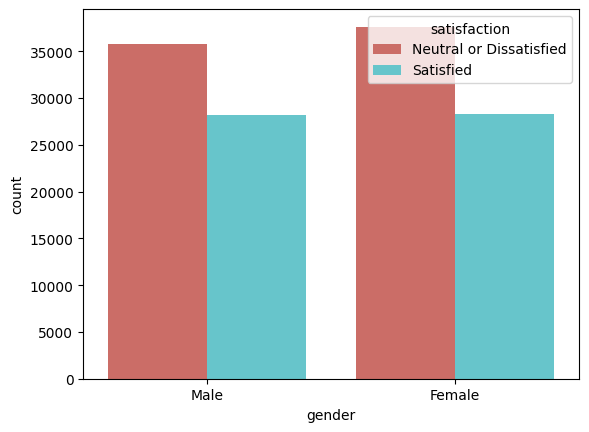

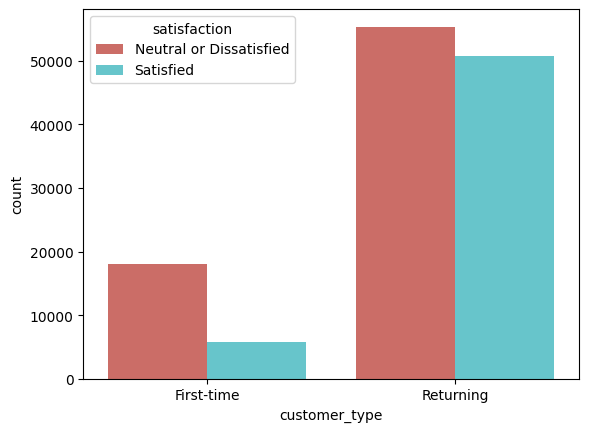

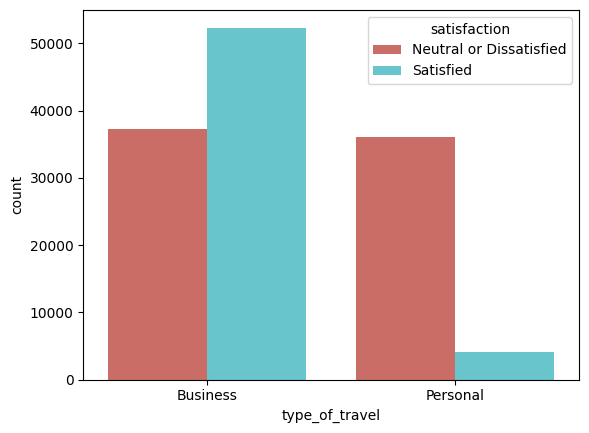

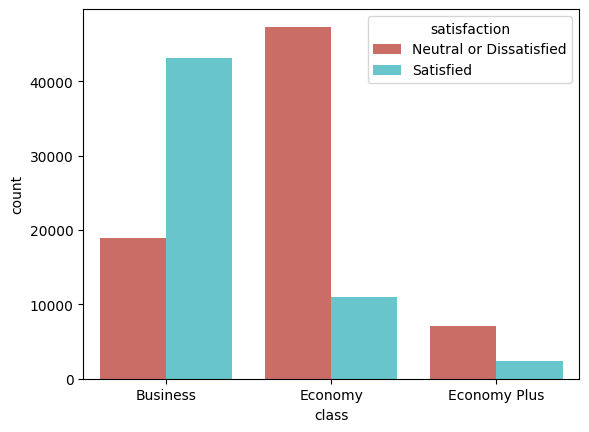

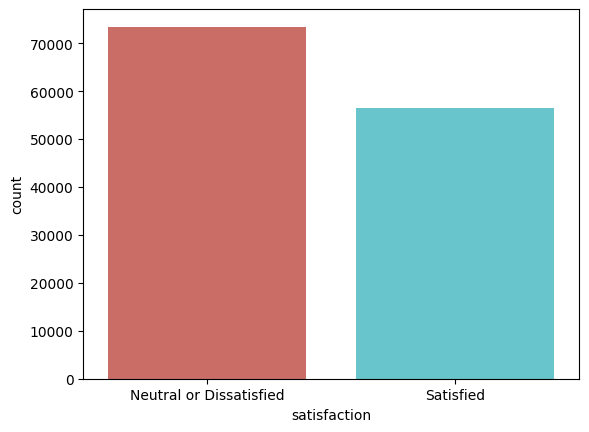

In [23]:

for i in categorical_features:
    sns.countplot(x=i, hue='satisfaction', data=df, palette='hls')
    plt.show()
    

<div style="background-color: #f0f8ff; padding: 20px; border-radius: 5px;">
  <h3><i style="color: darkorange;"></i><strong>Interpretation of Satisfaction Distribution by Gender</strong></h3>
  <p>The provided bar chart compares the counts of 'Satisfied' and 'Neutral or Dissatisfied' passengers across different genders ('Male' and 'Female').</p>
  <p><b>Key Observations:</b></p>
  <ul>
    <li>For both 'Male' and 'Female' passengers, the count of 'Neutral or Dissatisfied' passengers (shown in red) is higher than the count of 'Satisfied' passengers (shown in cyan).</li>
    <li>Among 'Male' passengers, there are approximately 36,000 who are 'Neutral or Dissatisfied' and around 28,000 who are 'Satisfied'.</li>
    <li>Among 'Female' passengers, there are slightly more 'Neutral or Dissatisfied' passengers (a bit over 37,000) compared to 'Male' 'Neutral or Dissatisfied' passengers. The number of 'Satisfied' female passengers (around 28,000) is similar to the number of 'Satisfied' male passengers.</li>
    <li>The difference in counts between 'Neutral or Dissatisfied' and 'Satisfied' is more pronounced for female passengers compared to male passengers in this visualization.</li>
  </ul>
  <p><b>Interpretation:</b></p>
  <p>The chart suggests that for both genders, a larger proportion of passengers fall into the 'Neutral or Dissatisfied' category. While the number of satisfied male and female passengers is similar, there are slightly more neutral or dissatisfied female passengers in this dataset.</p>
  <p><b>Implications for Analysis:</b></p>
  <ul>
    <li>Gender might have a subtle influence on overall satisfaction, with female passengers potentially being slightly more inclined towards neutrality or dissatisfaction in this dataset. However, the difference isn't drastic.</li>
  </ul>
</div>

<div style="background-color: #f0f8ff; padding: 20px; border-radius: 5px;">
  <h3><i style="color: darkorange;"></i><strong>Interpretation of Satisfaction Distribution by Customer Type</strong></h3>
  <p>The provided bar chart compares the counts of 'Satisfied' and 'Neutral or Dissatisfied' passengers based on their 'Customer Type' ('First-time' or 'Returning').</p>
  <p><b>Key Observations:</b></p>
  <ul>
    <li>For 'First-time' customers, the number of 'Neutral or Dissatisfied' passengers (shown in red) is significantly higher than the number of 'Satisfied' passengers (shown in cyan).</li>
    <li>For 'Returning' customers, the number of 'Neutral or Dissatisfied' passengers is also higher than 'Satisfied' passengers, but the difference is less pronounced compared to 'First-time' customers.</li>
    <li>The number of 'Neutral or Dissatisfied' passengers is considerably higher for 'Returning' customers compared to 'First-time' customers.</li>
    <li>The number of 'Satisfied' passengers is also much higher for 'Returning' customers compared to 'First-time' customers.</li>
  </ul>
  <p><b>Interpretation:</b></p>
  <p>The chart indicates a clear trend: 'Returning' customers make up a larger portion of both satisfied and neutral/dissatisfied passengers compared to 'First-time' customers. However, the proportion of dissatisfied passengers is notably higher among 'First-time' customers. This suggests that the initial experience with the airline might be a critical factor influencing overall satisfaction and repeat business.</p>
  <p><b>Implications for Analysis and Business Goals:</b></p>
  <ul>
    <li>'Customer Type' appears to be a significant factor in predicting satisfaction. 'Returning' customers are more likely to be satisfied, but they also constitute a larger segment of the dissatisfied population, likely due to higher expectations based on previous experiences.</li>
    <li>The high dissatisfaction rate among 'First-time' customers is a key pain point that the airline needs to address to improve overall customer experience and foster loyalty, aligning with the business goal.</li>
  </ul>
</div>

<div style="background-color: #f0f8ff; padding: 20px; border-radius: 5px;">
  <h3><i style="color: darkorange;"></i><strong>Interpretation of Satisfaction Distribution by Type of Travel</strong></h3>
  <p>The provided bar chart compares the counts of 'Satisfied' and 'Neutral or Dissatisfied' passengers based on their 'Type of Travel' ('Business' or 'Personal').</p>
  <p><b>Key Observations:</b></p>
  <ul>
    <li>For 'Business' travelers, the number of 'Satisfied' passengers (shown in cyan) is notably higher than the number of 'Neutral or Dissatisfied' passengers (shown in red).</li>
    <li>For 'Personal' travelers, the number of 'Neutral or Dissatisfied' passengers is substantially higher than the number of 'Satisfied' passengers.</li>
    <li>The total number of passengers traveling for 'Business' appears to be higher than those traveling for 'Personal' reasons in this dataset.</li>
  </ul>
  <p><b>Interpretation:</b></p>
  <p>The chart reveals a strong correlation between the type of travel and passenger satisfaction. Business travelers are more likely to be satisfied with the airline's services, while personal travelers are more likely to be neutral or dissatisfied.</p>
  <p><b>Implications for Analysis and Business Goals:</b></p>
  <ul>
    <li>'Type of Travel' is a significant predictor of passenger satisfaction. The airline seems to be catering well to the needs and expectations of business travelers.</li>
    <li>The high dissatisfaction rate among personal travelers is a critical pain point that needs attention to improve overall customer experience, aligning with the business goal.</li>

  </ul>
</div>

<div style="background-color: #f0f8ff; padding: 20px; border-radius: 5px;">
  <h3><strong>Interpretation of Satisfaction Distribution by Travel Class</strong></h3>
  <p>The provided bar chart compares the counts of 'Satisfied' and 'Neutral or Dissatisfied' passengers across different travel classes ('Business', 'Economy', and 'Economy Plus').</p>
  <p><b>Key Observations:</b></p>
  <ul>
    <li>For 'Business' class passengers, the number of 'Satisfied' passengers (shown in cyan) is significantly higher than the number of 'Neutral or Dissatisfied' passengers (shown in red).</li>
    <li>For 'Economy' class passengers, the number of 'Neutral or Dissatisfied' passengers is substantially higher than the number of 'Satisfied' passengers.</li>
    <li>For 'Economy Plus' class passengers, the number of 'Neutral or Dissatisfied' passengers is also higher than the number of 'Satisfied' passengers, although the total number of passengers in this class appears to be the lowest among the three.</li>
    <li>The total number of passengers in 'Economy' class is the highest, followed by 'Business' class, and then 'Economy Plus'.</li>
  </ul>
  <p><b>Interpretation:</b></p>
  <p>The chart clearly shows a strong relationship between travel class and passenger satisfaction. Passengers traveling in 'Business' class are much more likely to be satisfied. In contrast, passengers in 'Economy' and 'Economy Plus' classes are more likely to be neutral or dissatisfied, with 'Economy' class showing the largest number of dissatisfied passengers.</p>
  <p><b>Implications for Analysis and Business Goals:</b></p>
  <ul>
    <li>'Class' is a critical factor influencing passenger satisfaction. The different satisfaction levels across classes likely reflect variations in service, comfort, and amenities offered.</li>
    <li>The high dissatisfaction rate in 'Economy' class is a significant pain point that needs to be addressed to improve overall customer experience, aligning with the business goal. Understanding the specific issues and expectations of economy class passengers is crucial.</li>
    <li>While 'Economy Plus' also shows more dissatisfaction than satisfaction, the smaller sample size might warrant further investigation.</li>
  </ul>
</div>

<div style="background-color: #f0f8ff; padding: 20px; border-radius: 5px;">
  <h3><strong>Interpretation of Overall Satisfaction Distribution</strong></h3>
  <p>The provided bar chart shows the distribution of the overall satisfaction level of the airline passengers, categorized into 'Neutral or Dissatisfied' and 'Satisfied'.</p>
  <p><b>Key Observations:</b></p>
  <ul>
    <li>The bar representing 'Neutral or Dissatisfied' passengers (shown in red) is significantly taller than the bar representing 'Satisfied' passengers (shown in cyan).</li>
    <li>The count of 'Neutral or Dissatisfied' passengers is approximately 73,000.</li>
    <li>The count of 'Satisfied' passengers is approximately 57,000.</li>
  </ul>
  <p><b>Interpretation:</b></p>
  <p>The chart indicates that in this dataset, there is a larger number of passengers who are either neutral or dissatisfied with the airline's services compared to those who are satisfied. This highlights a potential area for improvement in customer experience to shift more passengers towards the 'Satisfied' category.</p>
  <p><b>Implications for Analysis and Business Goals:</b></p>
  <ul>
    <li>The imbalance in the target variable ('Overall Satisfaction') is important to consider when building a machine learning model. It might indicate a need for techniques to handle imbalanced datasets to ensure the model doesn't become biased towards predicting the majority class ('Neutral or Dissatisfied').</li>
    <li>The business goal of improving overall customer experience by identifying pain points is directly supported by this visualization. It confirms that there is a significant portion of the customer base that is not satisfied. Further analysis of the other features and their relationship with satisfaction can help pinpoint these pain points.</li>
    <li>Predicting customer satisfaction (another business goal) will involve understanding the factors that differentiate the 'Satisfied' group from the 'Neutral or Dissatisfied' group. The subsequent analysis of other features will be crucial for this.</li>
  </ul>
</div>

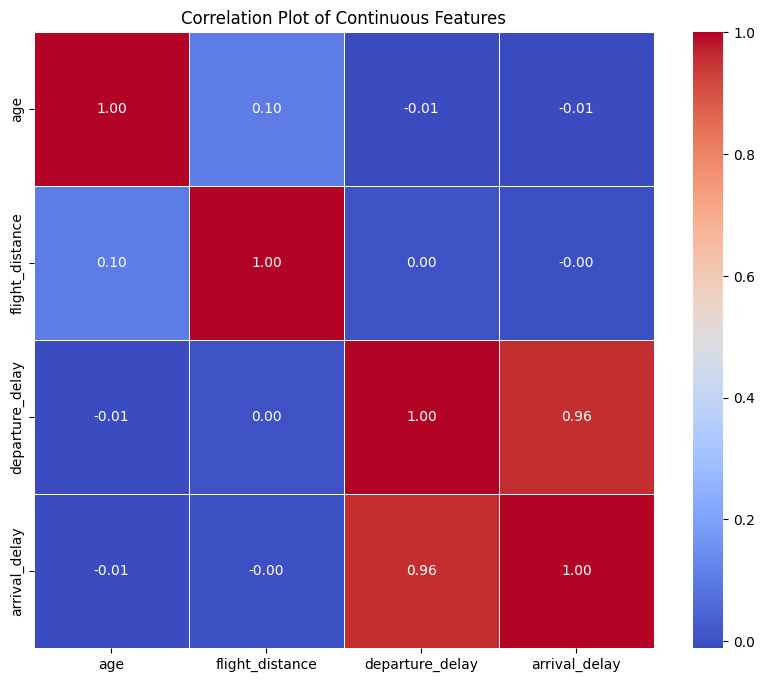

In [24]:

corr_matrix = df[continuous_features].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Plot of Continuous Features")
plt.show()


<div style="background-color: #f0f8ff; padding: 20px; border-radius: 5px;">
  <h3><i style="color: darkorange;"></i><strong>Interpretation of the Correlation Plot of Continuous Features</strong></h3>
  <p>The provided heatmap displays the pairwise correlations between the continuous features in the airline passenger satisfaction dataset: 'age', 'flight_distance', 'departure_delay', and 'arrival_delay'. The color intensity and the numerical values within each cell indicate the strength and direction of the linear correlation.</p>
  <p><b>Key Observations:</b></p>
  <ul>
    <li>The correlation between 'departure_delay' and 'arrival_delay' is very high (0.96), as indicated by the strong red color and the value close to 1. This suggests a strong positive linear relationship: flights with longer departure delays tend to have longer arrival delays as well. This aligns with the problem statement's goal of understanding factors affecting satisfaction.</li>
    <li>The correlation between 'age' and 'flight_distance' is weak but slightly positive (0.10), indicated by a light shade moving towards red. This suggests a minor tendency for older passengers to travel slightly longer distances.</li>
    <li>The correlation between 'age' and 'departure_delay' is very weak (-0.01), close to zero and indicated by a light blue color. This suggests almost no linear relationship between a passenger's age and the departure delay of their flight.</li>
    <li>Similarly, the correlation between 'age' and 'arrival_delay' is also very weak (-0.01), indicated by a light blue color and a value close to zero. This suggests almost no linear relationship between a passenger's age and the arrival delay of their flight.</li>
    <li>The correlation between 'flight_distance' and 'departure_delay' is very weak (0.00), indicated by a neutral color. This suggests almost no linear relationship between the flight distance and the departure delay.</li>
    <li>The correlation between 'flight_distance' and 'arrival_delay' is also very weak (-0.00), indicated by a neutral color. This suggests almost no linear relationship between the flight distance and the arrival delay.</li>
    <li>The diagonal cells show a correlation of 1.00, as each feature is perfectly correlated with itself.</li>
  </ul>
  <p><b>Interpretation:</b></p>
  <p>The heatmap highlights a strong positive linear relationship between departure and arrival delays, which is an expected finding in flight operations. There is a slight positive correlation between age and flight distance. However, passenger age shows virtually no linear correlation with either departure or arrival delays, and flight distance also shows negligible linear correlation with the delays.</p>
</div>

<div style="background-color: #f0f8ff; padding: 20px; border-radius: 10px;">
  <h3 style="color: black;"><strong>Passenger Insights Summary</strong></h3>
  <p>This report summarizes key insights derived from the airline passenger satisfaction dataset. The analysis aims to understand the factors influencing customer satisfaction and provide actionable recommendations for service improvement.</p>

  <h4><strong>Demographics</strong></h4>
  <ul>
    <li><b>Gender:</b> The dataset is nearly balanced with 50.7% female and 49.3% male passengers, indicating an almost equal representation.</li> [cite: 15]
    <li><b>Age:</b> The age distribution is multi-modal, with significant passenger concentrations in the 20-30 and 40-50 age groups, suggesting a diverse age range of travelers.</li>
  </ul>

  <h4><strong>Customer and Travel Characteristics</strong></h4>
  <ul>
    <li><b>Customer Type:</b> A large majority (81.7%) of passengers are returning customers, while only 18.3% are first-time customers.</li>
    <li><b>Type of Travel:</b> Business travel accounts for 69.1% of passengers, with personal travel making up the remaining 30.9%.</li>
    <li><b>Class:</b> The distribution across travel classes is 47.9% Business, 44.9% Economy, and 7.25% Economy Plus.</li>
  </ul>

  <h4><strong>Satisfaction Overview</strong></h4>
  <ul>
    <li><b>Overall Satisfaction:</b> The dataset shows that 56.6% of passengers are neutral or dissatisfied, compared to 43.4% who are satisfied, highlighting a significant area for improvement.</li>
  </ul>

  <h4><strong>Flight-Related Factors</strong></h4>
  <ul>
    <li><b>Flight Distance:</b>  Flight distances vary widely, with a majority of passengers traveling shorter distances, but there's a notable presence of medium and long-haul flights.</li>
    <li><b>Delays:</b> Both departure and arrival delays are heavily right-skewed, indicating that most flights are on time, but some experience substantial delays.  Departure and arrival delays are strongly positively correlated (0.96).</li>
  </ul>

  <h4><strong>Service Ratings</strong></h4>
  <ul>
   <li><b>Departure/Arrival Time Convenience:</b> Ratings are generally positive, with most passengers rating 3 or higher, but there's room for improvement.</li>
   <li><b>Ease of Online Booking:</b>  Ratings are mixed, indicating moderate satisfaction but also areas needing enhancement.</li>
   <li><b>Check-in Service:</b>  Most passengers rate check-in service favorably.</li>
   <li><b>Online Boarding:</b>  A significant portion of passengers are satisfied, but improvements can be made.</li>
   <li><b>Gate Location:</b>  Ratings are centered around the middle, suggesting a neutral perception.</li>
   <li><b>On-board Service:</b>  Generally positive, but some passengers suggest enhancements.</li>
  </ul>

  <h4><strong>Satisfaction Drivers</strong></h4>
  <ul>
    <li><b>Age:</b>  There's a slight tendency for younger passengers to report higher satisfaction.</li>
    <li><b>Customer Type:</b> First-time customers are more likely to be dissatisfied compared to returning customers.</li>
     <li><b>Type of Travel:</b> Business travelers tend to be more satisfied than personal travel passengers.</li>
    <li><b>Class:</b> Business class passengers show the highest satisfaction, while Economy and Economy Plus passengers are often less satisfied.</li>
    <li><b>Flight Delays:</b> Longer flight delays are strongly associated with increased dissatisfaction.</li>
    <li><b>Flight Distance:</b>  Satisfied passengers tend to travel longer distances.</li>
  </ul>

  <h4 style="color: #000;"><strong>Recommendations</strong></h4>
  <p>Based on these insights, the airline should focus on minimizing flight delays, enhancing the experience for first-time and personal travel passengers, and improving service quality in Economy and Economy Plus classes.  Additionally, continued efforts to streamline online booking and maintain positive on-board service are essential.</p>
</div>

<div style="background-color: #f0f8ff; padding: 20px; border-radius: 5px;">
  <h3><i style="color: darkorange;"></i><strong>2.5.1. Outlier Detection and Treatment</strong></h3>
  <p>Outliers are extreme values that deviate significantly from the rest of the data. They can distort model performance and affect statistical summaries. It's important to detect and either remove or treat them based on business context.</p>
</div>

In [25]:
outliers_coll = []

def Outliers(df):
    for i in df.columns:
        Q1 = df[i].quantile(0.25)      
        Q3 = df[i].quantile(0.75)      
        IQR = Q3 - Q1           
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = df[(df[i] < lower_bound) | (df[i] > upper_bound)]
        if len(outliers) > 10:
            print(f"{i} : {len(outliers)}")
            outliers_coll.append(i)
    
Outliers(df.select_dtypes(exclude='object'))


flight_distance : 2855
departure_delay : 18098
arrival_delay : 17492
check-in_service : 16109


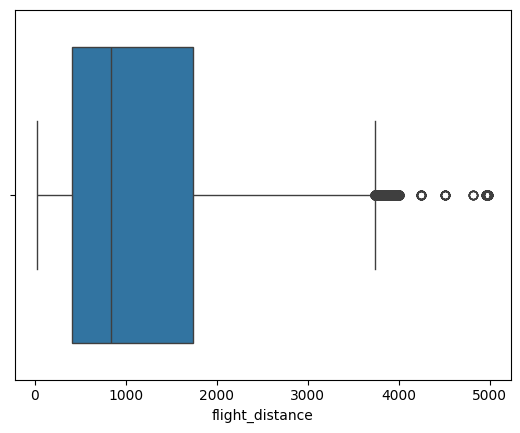

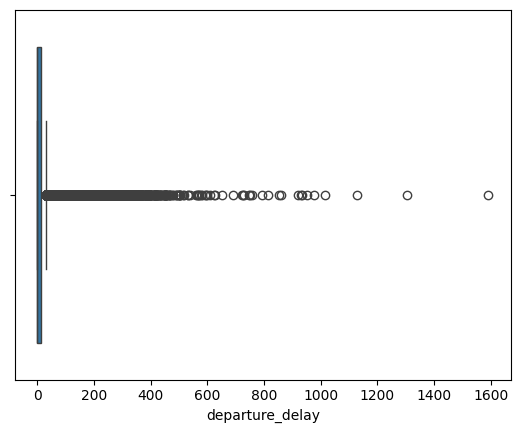

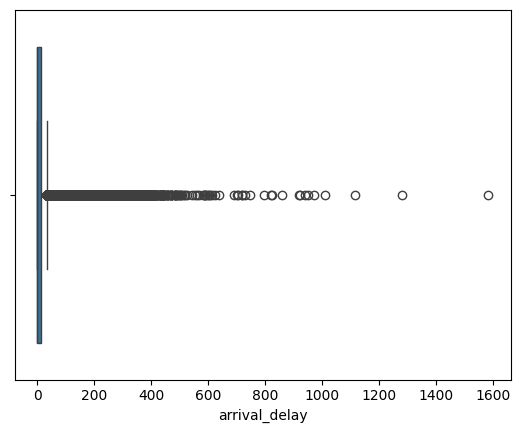

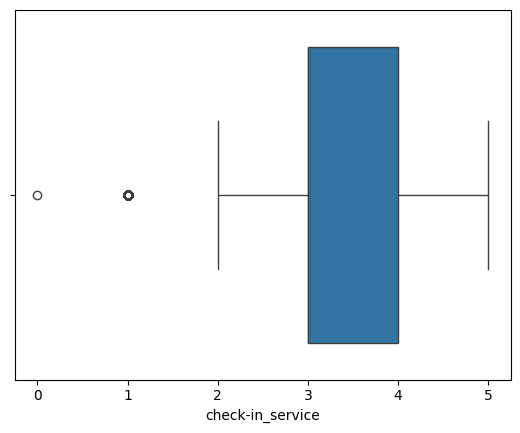

In [26]:

for i in ['flight_distance','departure_delay' , 'arrival_delay', 'check-in_service' ]:
    sns.boxplot(x=df[i])
    plt.show()
    

<div style="background-color: #f0f8ff; padding: 20px; border-radius: 5px;">
  <h3><strong>2.5.2. Encode Categorical Variables</strong></h3>
  <p>Required for ML models that only accept numerical input..</p>
</div>


In [27]:

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in df.select_dtypes(include=['object']):
    df[i] = le.fit_transform(df[i])


In [28]:

df.dtypes


gender                                      int32
age                                         int64
customer_type                               int32
type_of_travel                              int32
class                                       int32
flight_distance                             int64
departure_delay                             int64
arrival_delay                             float64
departure_and_arrival_time_convenience      int64
ease_of_online_booking                      int64
check-in_service                            int64
online_boarding                             int64
gate_location                               int64
on-board_service                            int64
seat_comfort                                int64
leg_room_service                            int64
cleanliness                                 int64
food_and_drink                              int64
in-flight_service                           int64
in-flight_wifi_service                      int64


<div style="background-color: #f0f8ff; padding: 20px; border-radius: 5px;">
  <h3><strong>2.6. Saving Cleaned Dataset</strong></h3>
  <p>The cleaned dataset has been saved for further use in model building and analysis.</p>
</div>



In [29]:

df.to_csv('../data/clean_data.csv', index=False)
